In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Constants
PARAMETER = 10
LINEAR_REGRESSION_ERROR_RANGE = 3
ERROR_RANGE = 1.0001
MUTATION_RATE = 0.1
NUM_POINTS = 45
NUM_ELITES = 2  # Number of best lines to retain across generations

In [ ]:
# Function 1: Generate random points along a line with added noise
# This function is already implemented for you.

def generate_random_points(num_points, slope, intercept):
    noise = np.random.normal(0, LINEAR_REGRESSION_ERROR_RANGE, num_points)
    x_coords = np.random.uniform(-PARAMETER, PARAMETER, num_points)
    y_coords = slope * x_coords + intercept + noise
    return np.column_stack((x_coords, y_coords))

In [ ]:
def generate_random_lines(num_lines):
    lines = []
    for _ in range(num_lines):
        slope = random.uniform(-PARAMETER, PARAMETER)
        intercept = random.uniform(-PARAMETER, PARAMETER)
        lines.append([slope, intercept])
    return lines


In [ ]:
def calculate_errors(lines, points):
    x = points[:, 0]
    y = points[:, 1]

    errors = []
    for slope, intercept in lines:
        y_pred = slope * x + intercept
        error = np.sum((y_pred - y) ** 2)
        errors.append(error)

    return np.array(errors)


In [ ]:
def mutate(line, mutation_rate=MUTATION_RATE):
    slope, intercept = line

    if random.random() < mutation_rate:
        slope += random.uniform(-0.1, 0.1) * (abs(slope) + 1)

    if random.random() < mutation_rate:
        intercept += random.uniform(-0.1, 0.1) * (abs(intercept) + 1)

    return [slope, intercept]


In [ ]:
def create_next_generation(lines, points, num_elites=NUM_ELITES):
    errors = calculate_errors(lines, points)
    sorted_indices = np.argsort(errors)

    # Elitism
    elites = [lines[i] for i in sorted_indices[:num_elites]]

    next_generation = elites.copy()

    while len(next_generation) < len(lines):
        parent1 = random.choice(elites)
        parent2 = random.choice(lines)

        # Crossover
        child = [parent1[0], parent2[1]]

        # Mutation
        child = mutate(child)

        next_generation.append(child)

    return next_generation


In [ ]:
# Function 6: Visualization function
# This has been implemented for you

def plot_progress(points, actual_line, predicted_line, generation):
    x = points[:, 0]
    y = points[:, 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Data Points", color="blue")

    x_fit = np.linspace(min(x), max(x), 100)
    y_actual = actual_line[0] * x_fit + actual_line[1]
    y_predicted = predicted_line[0] * x_fit + predicted_line[1]

    plt.plot(x_fit, y_actual, label="Actual Line", color="green", linewidth=2)
    plt.plot(x_fit, y_predicted, label=f"Predicted Line (Gen {generation})", color="red", linestyle="dashed")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Genetic Algorithm Progress")
    plt.legend()
    plt.show()


In [ ]:
def genetic_algorithm():
    # Generate test data
    num_points = NUM_POINTS
    true_slope = random.uniform(-PARAMETER, PARAMETER)
    true_intercept = random.uniform(-PARAMETER, PARAMETER)
    test_points = generate_random_points(num_points, true_slope, true_intercept)
    actual_line = [true_slope, true_intercept]

    print("Actual Line:", actual_line)

    # Initialize generation
    MAX_GENERATIONS = 100
    num_lines = 50
    lines = generate_random_lines(num_lines)

    generation = 0

    while generation < MAX_GENERATIONS:
        errors = calculate_errors(lines, test_points)
        best_idx = np.argmin(errors)
        best_line = lines[best_idx]
        best_error = errors[best_idx]

        print(f"Generation {generation}, Best Error: {best_error:.4f}")

        plot_progress(test_points, actual_line, best_line, generation)

        if best_error < ERROR_RANGE:
            print("Converged!")
            break

        lines = create_next_generation(lines, test_points)
        generation += 1


Actual Line: [-6.083788234339664, -2.30555048083001]
Generation 0, Best Error: 894.1678


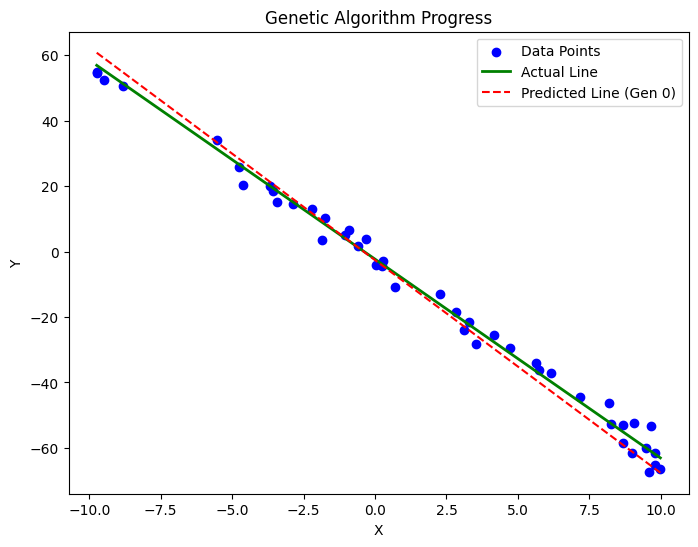

Generation 1, Best Error: 549.0808


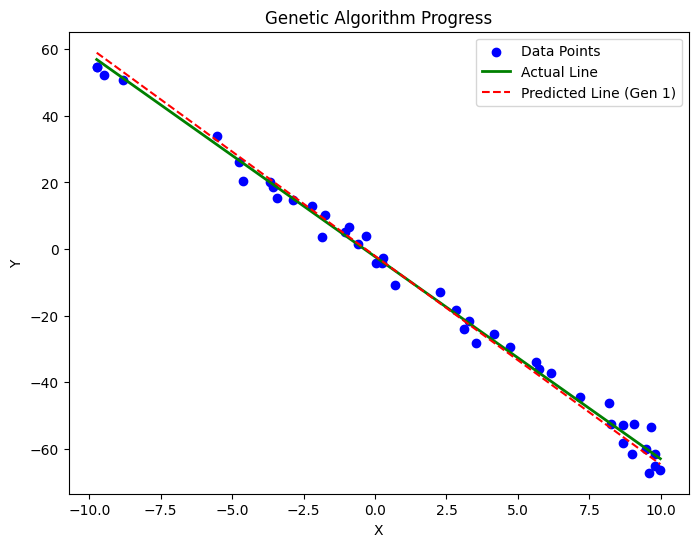

Generation 2, Best Error: 549.0808


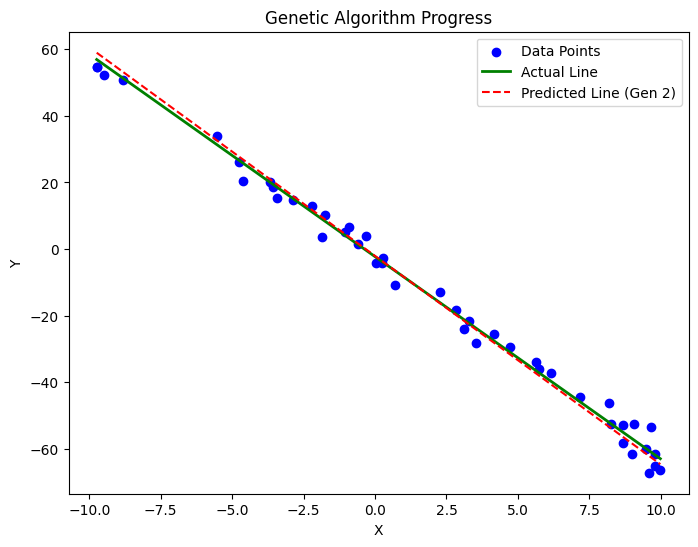

Generation 3, Best Error: 549.0808


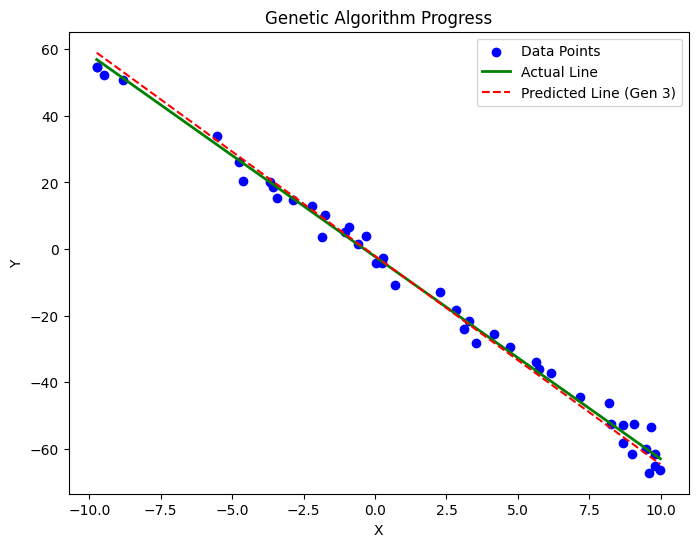

Generation 4, Best Error: 549.0808


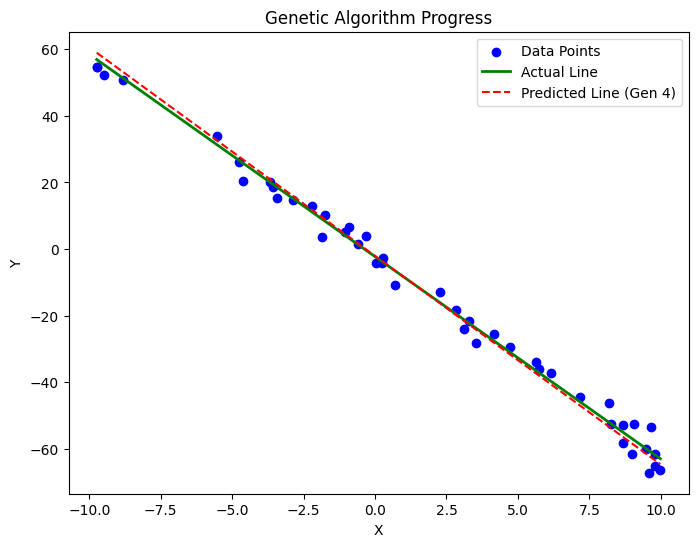

Generation 5, Best Error: 525.8278


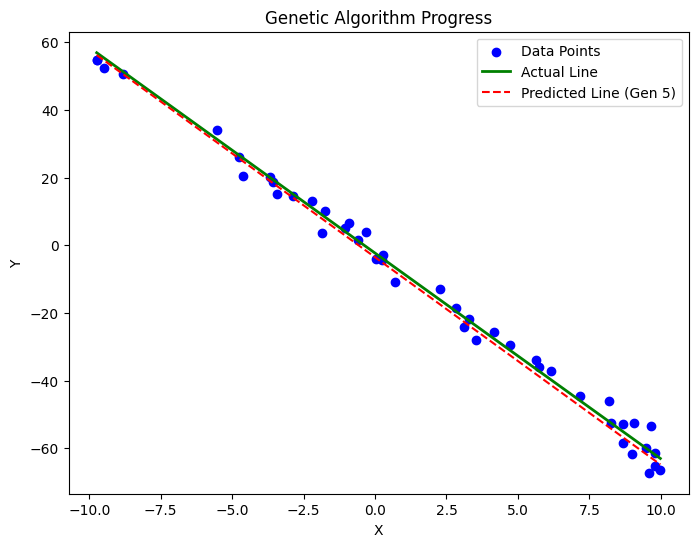

Generation 6, Best Error: 462.1305


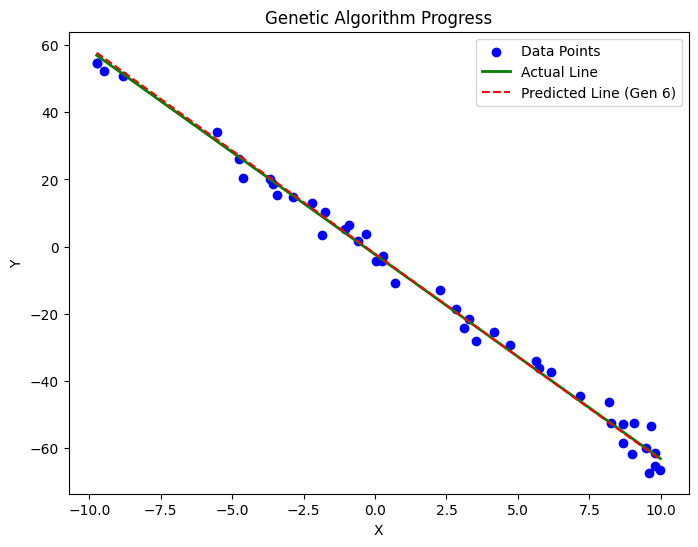

Generation 7, Best Error: 454.3863


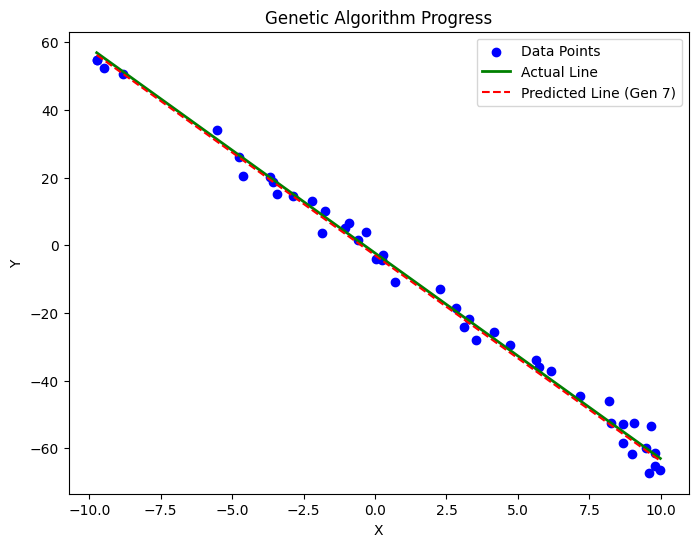

Generation 8, Best Error: 445.4219


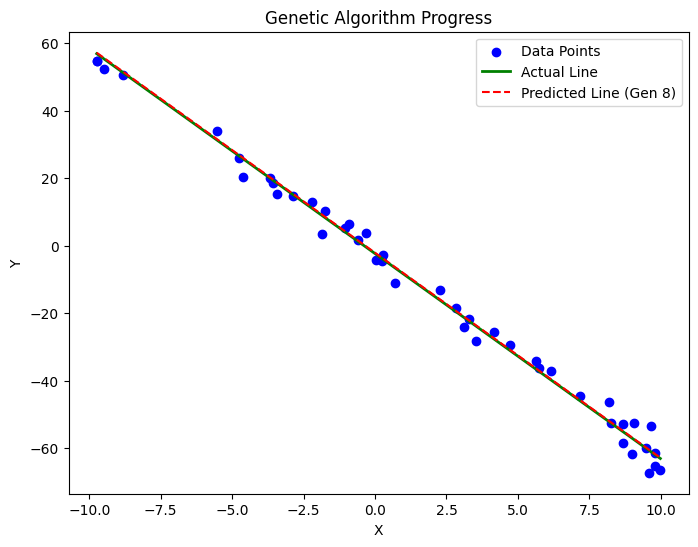

Generation 9, Best Error: 442.0427


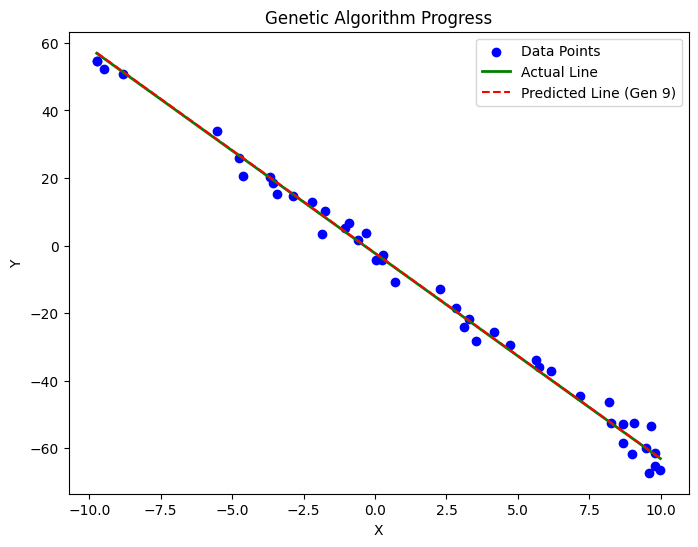

Generation 10, Best Error: 442.0427


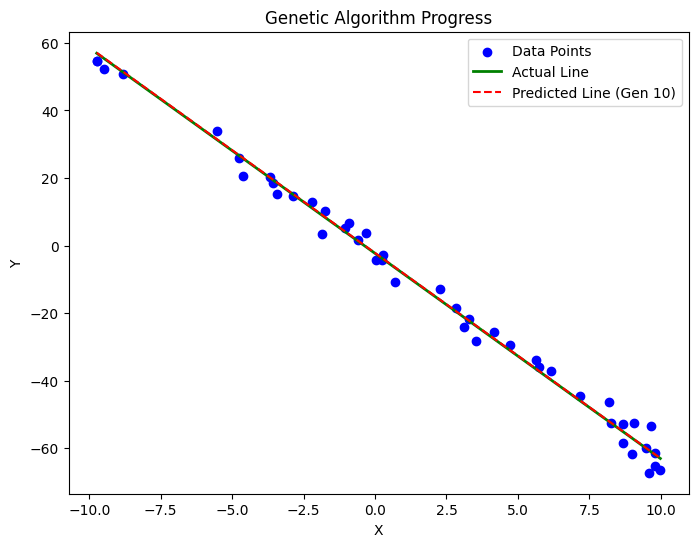

Generation 11, Best Error: 442.0427


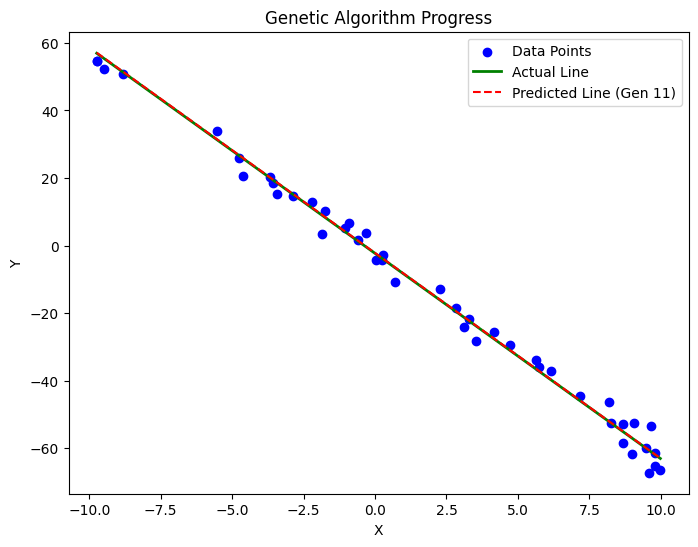

Generation 12, Best Error: 439.7798


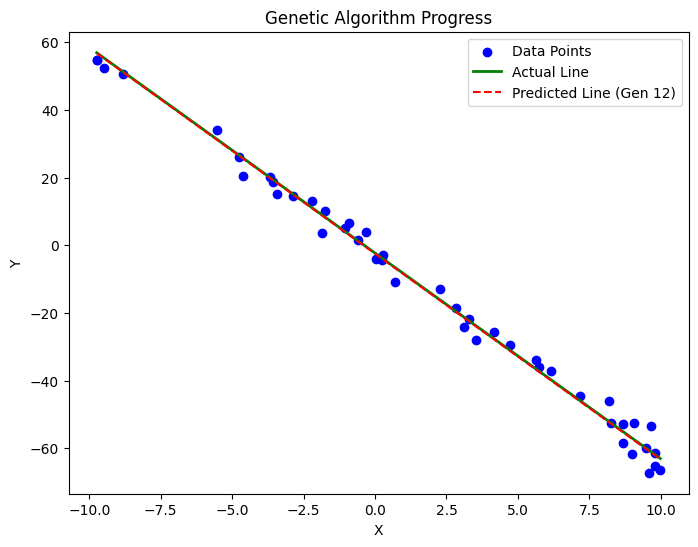

Generation 13, Best Error: 435.1992


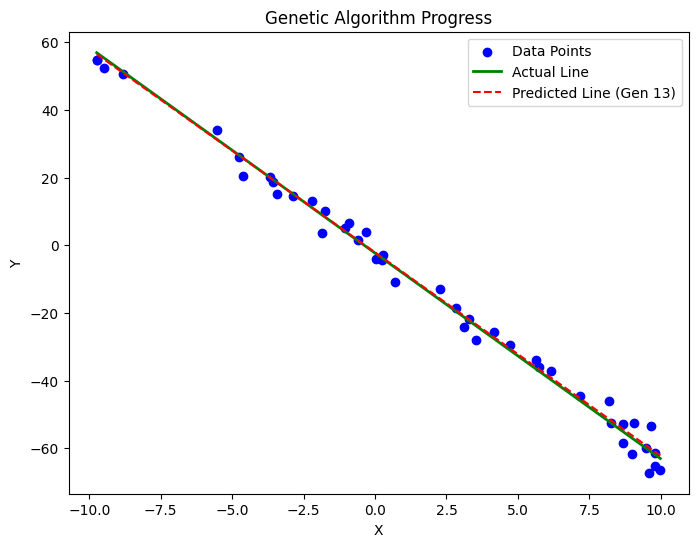

Generation 14, Best Error: 426.2041


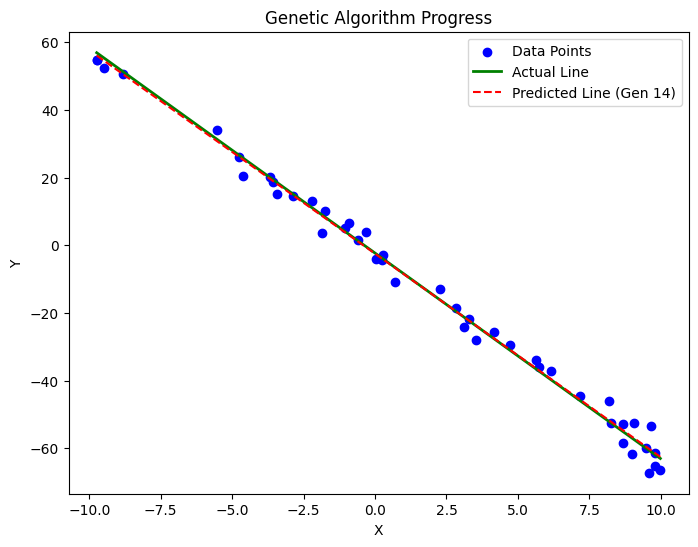

Generation 15, Best Error: 426.2041


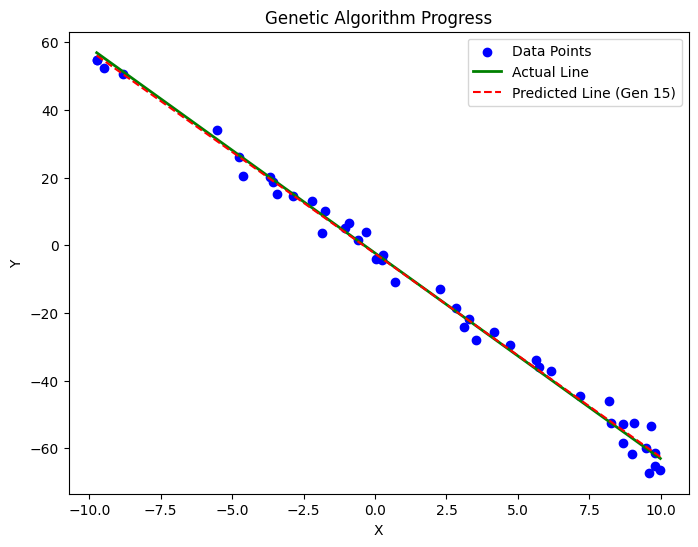

Generation 16, Best Error: 426.2041


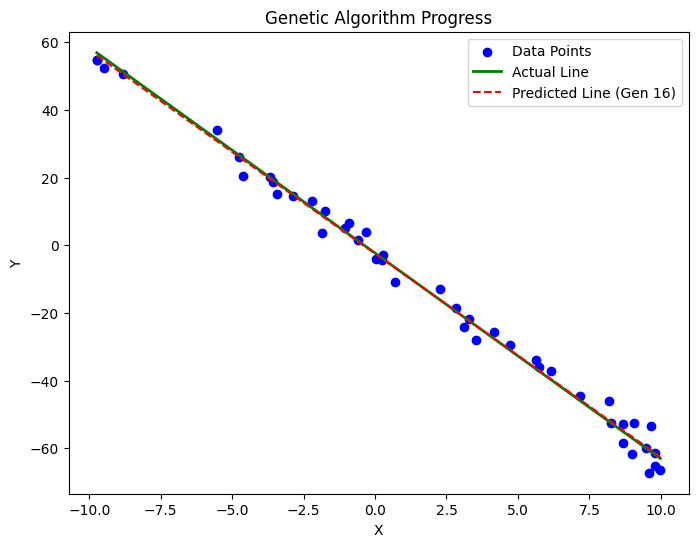

Generation 17, Best Error: 426.2041


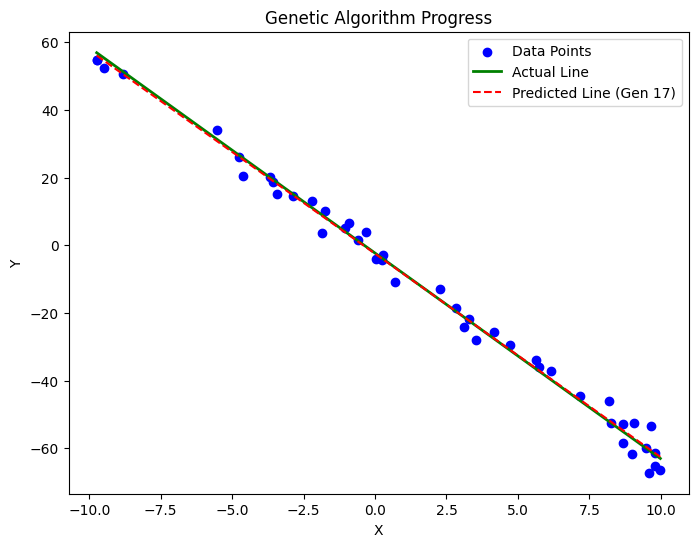

Generation 18, Best Error: 426.2041


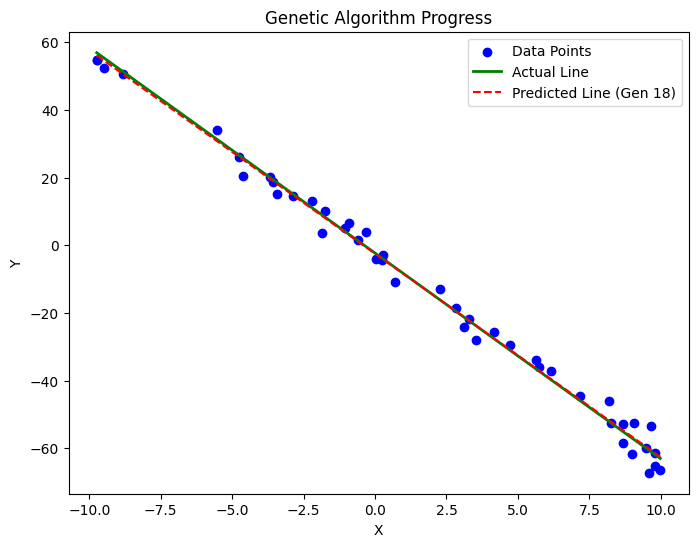

Generation 19, Best Error: 426.2041


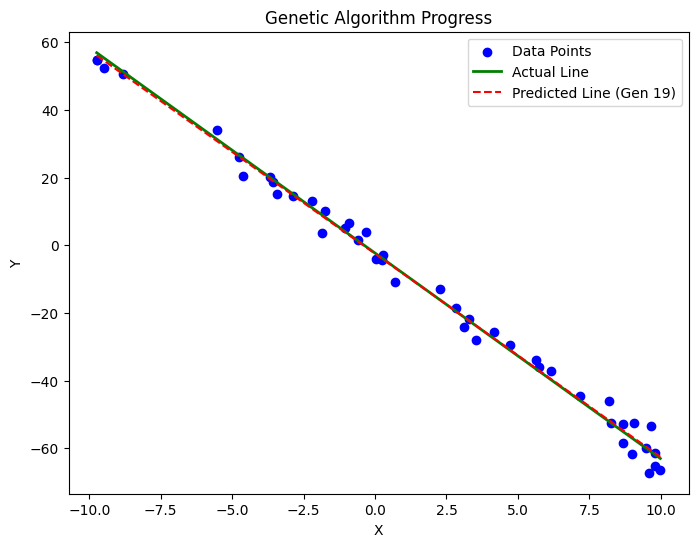

Generation 20, Best Error: 426.2041


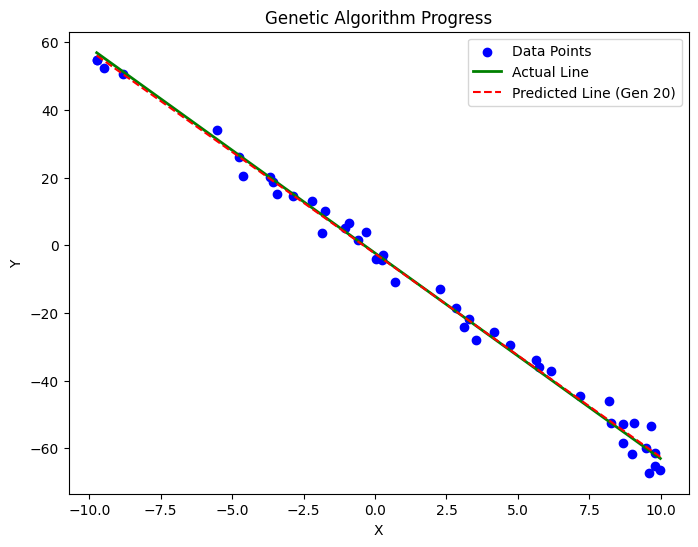

Generation 21, Best Error: 426.2041


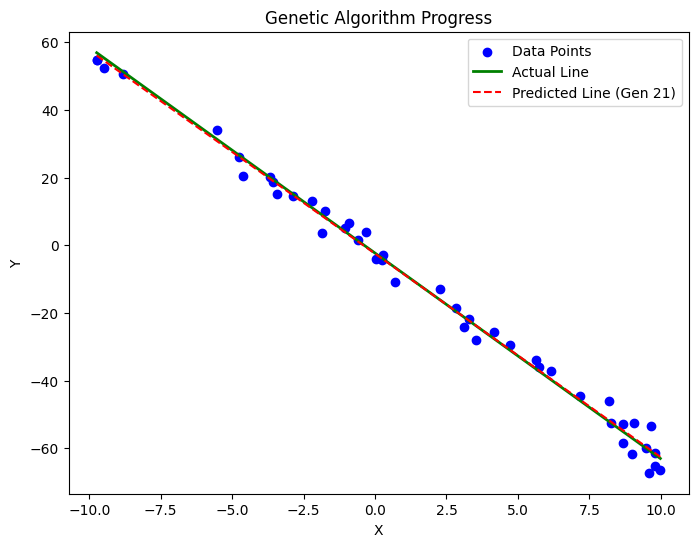

Generation 22, Best Error: 426.2041


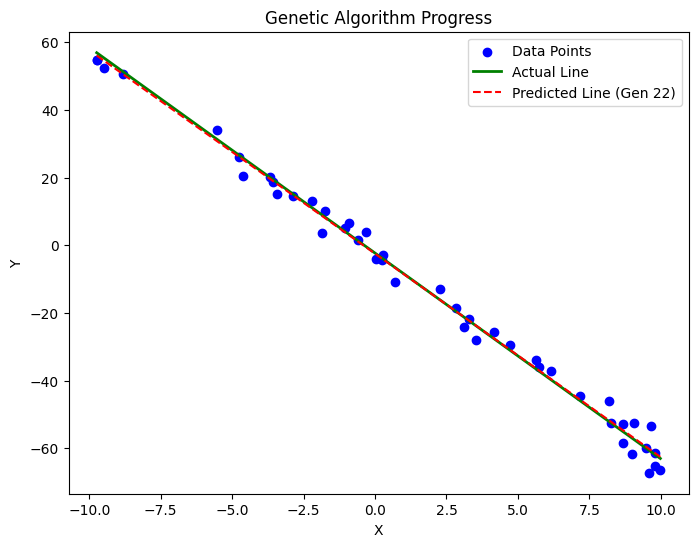

Generation 23, Best Error: 426.0252


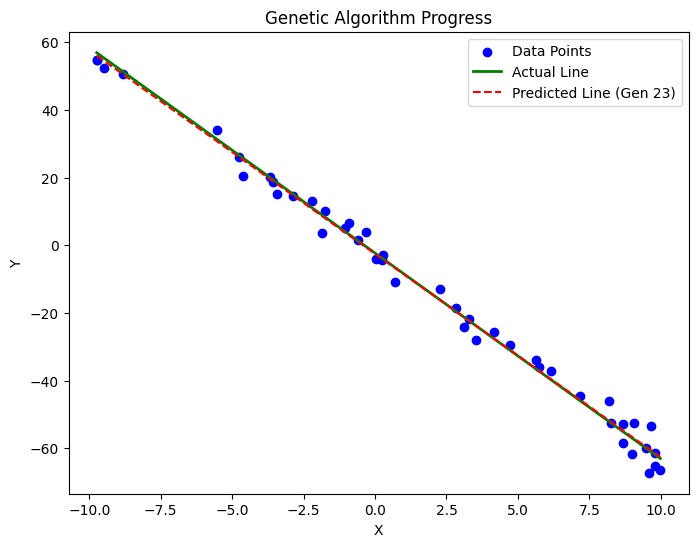

Generation 24, Best Error: 426.0252


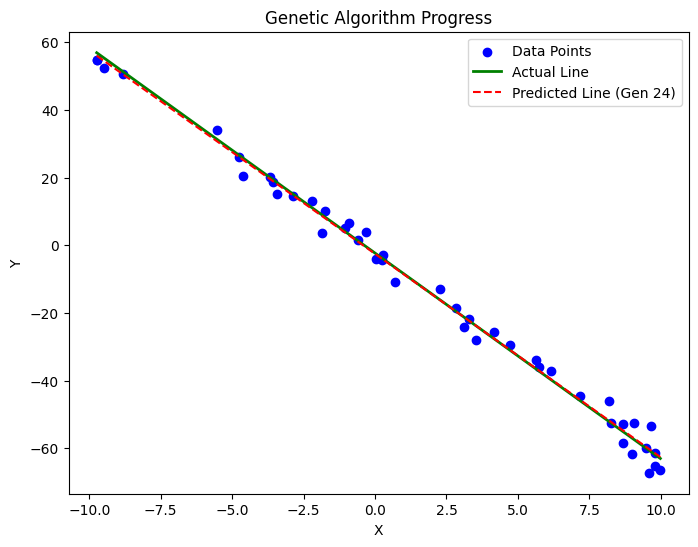

Generation 25, Best Error: 426.0252


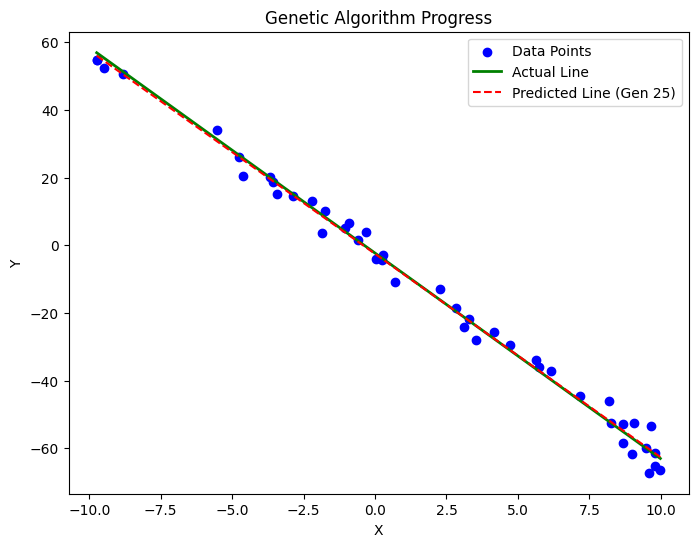

Generation 26, Best Error: 426.0252


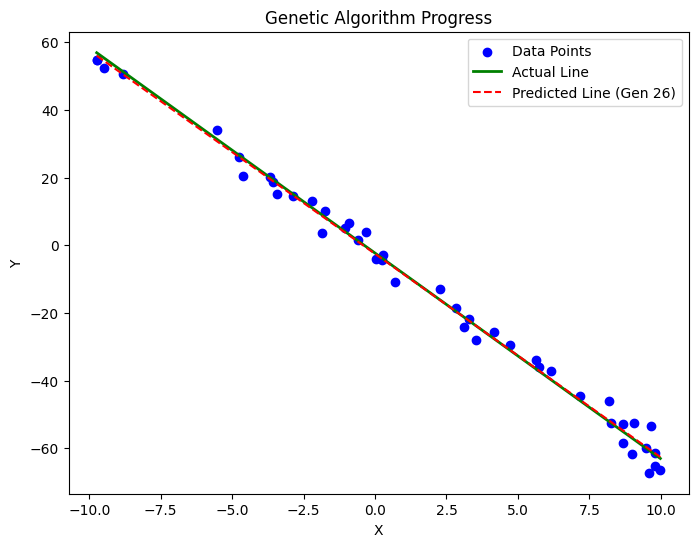

Generation 27, Best Error: 426.0252


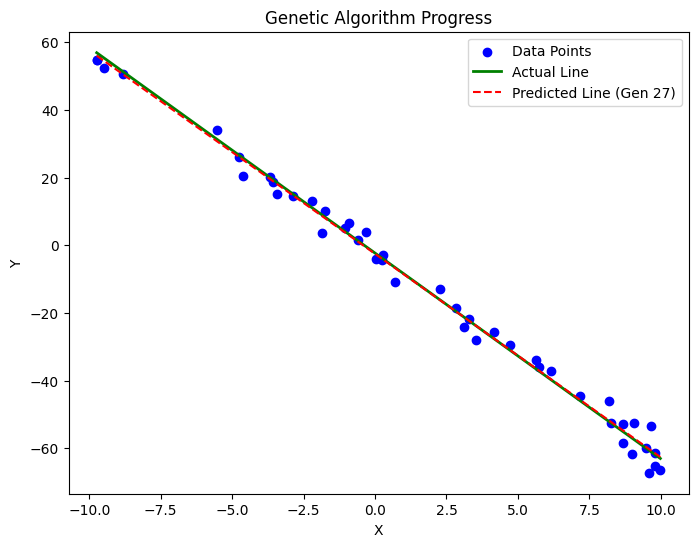

Generation 28, Best Error: 426.0132


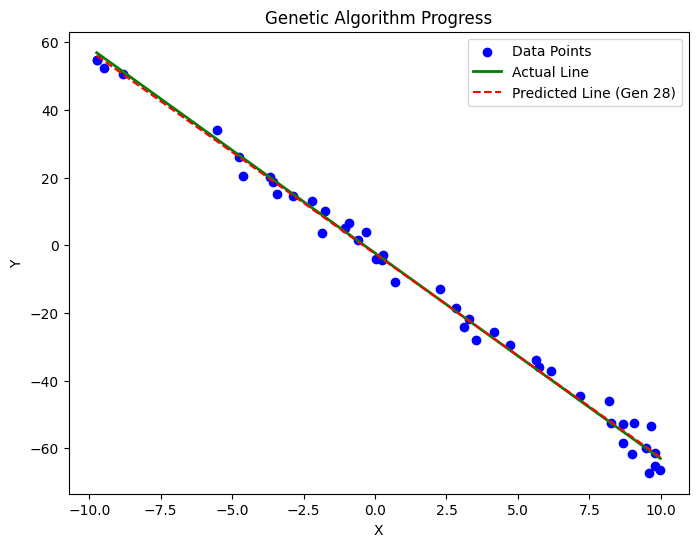

Generation 29, Best Error: 426.0132


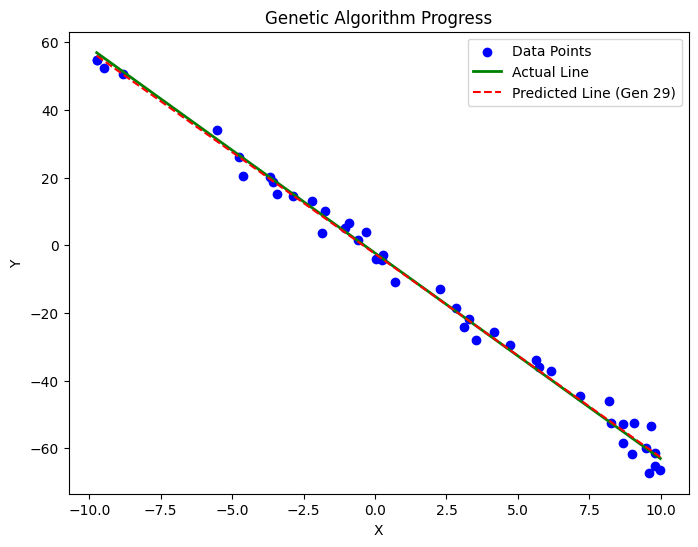

Generation 30, Best Error: 426.0132


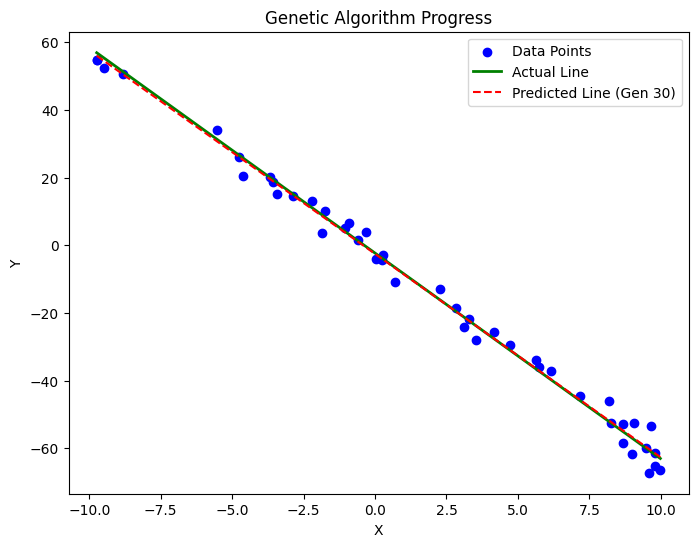

Generation 31, Best Error: 425.1621


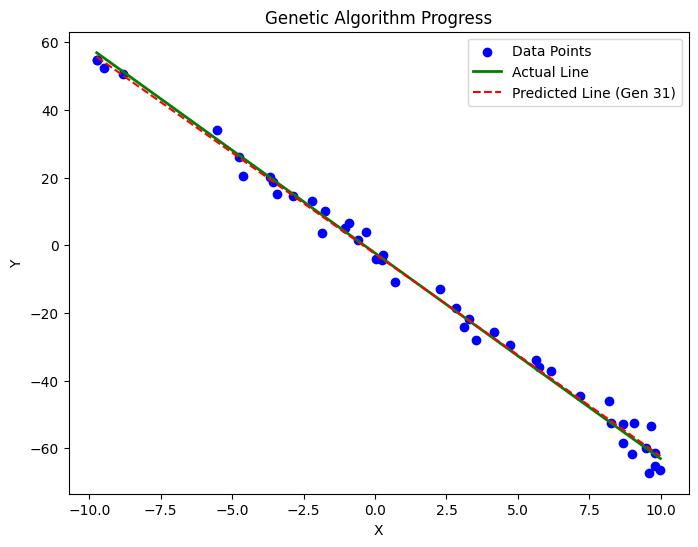

Generation 32, Best Error: 425.1621


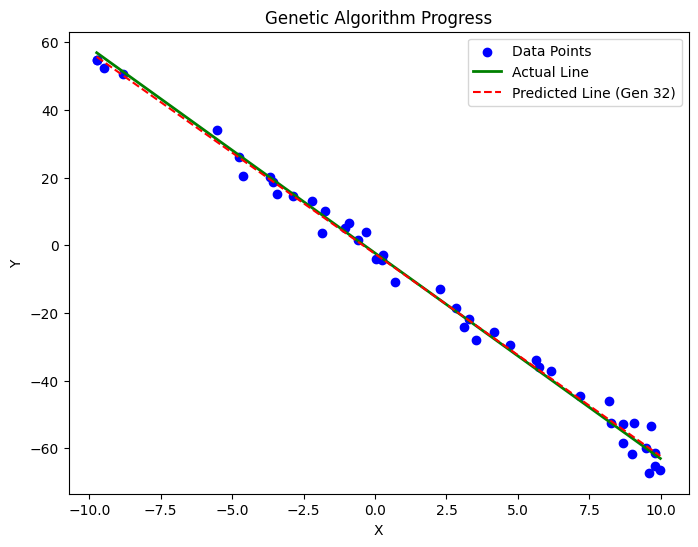

Generation 33, Best Error: 425.1621


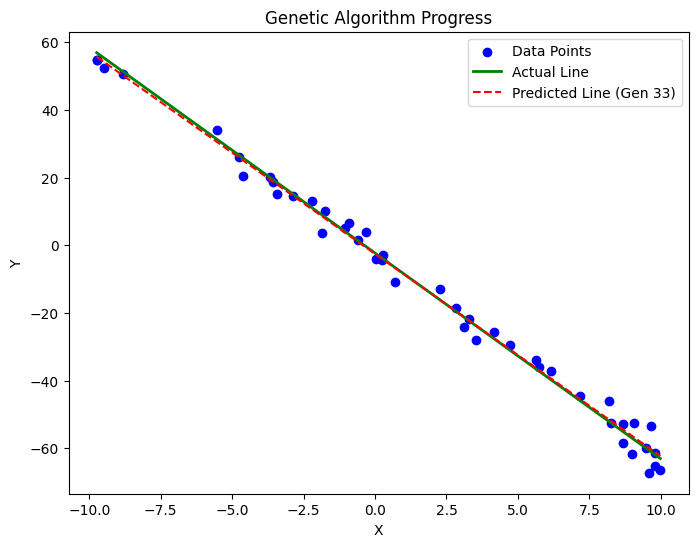

Generation 34, Best Error: 425.1621


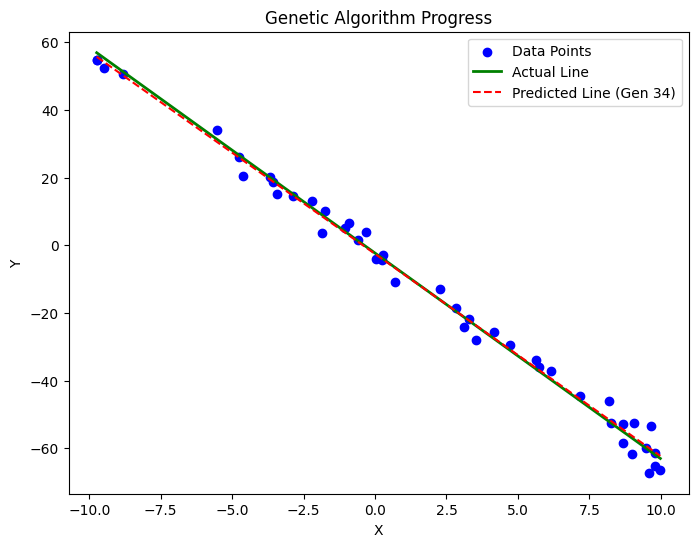

Generation 35, Best Error: 425.1621


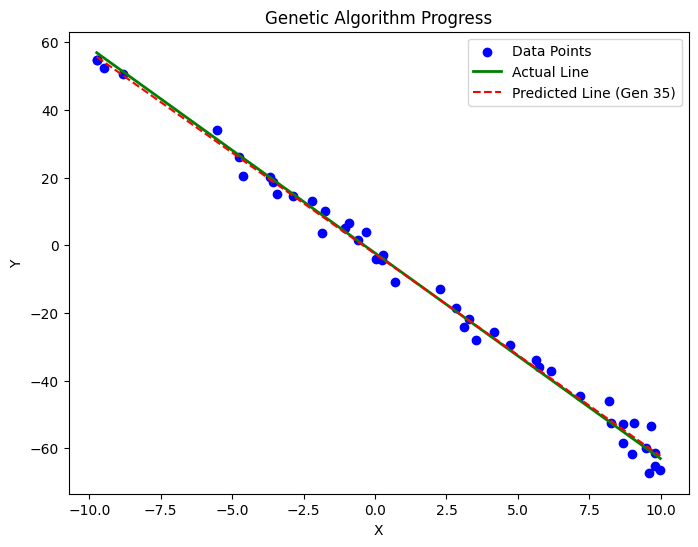

Generation 36, Best Error: 425.0875


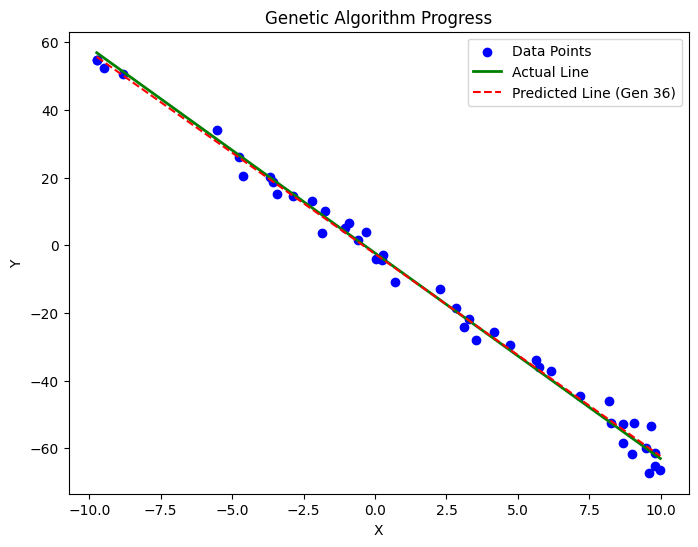

Generation 37, Best Error: 425.0875


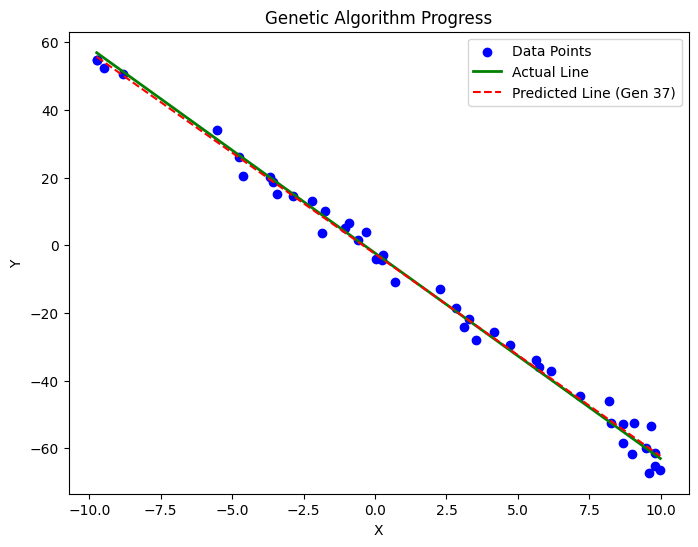

Generation 38, Best Error: 425.0875


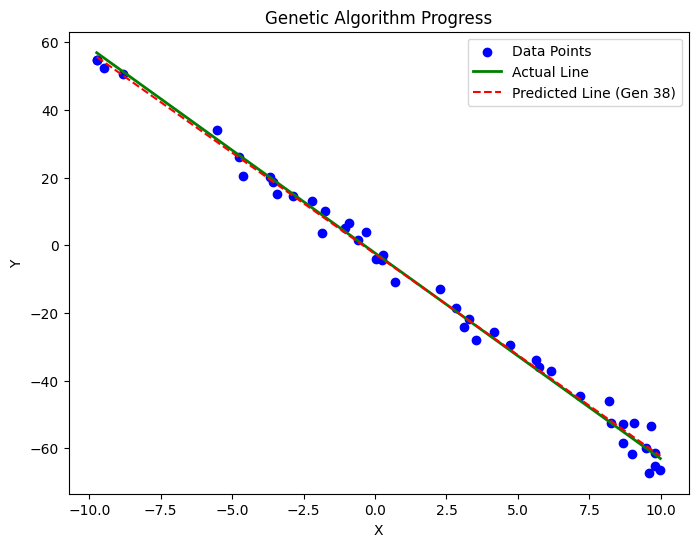

Generation 39, Best Error: 425.0875


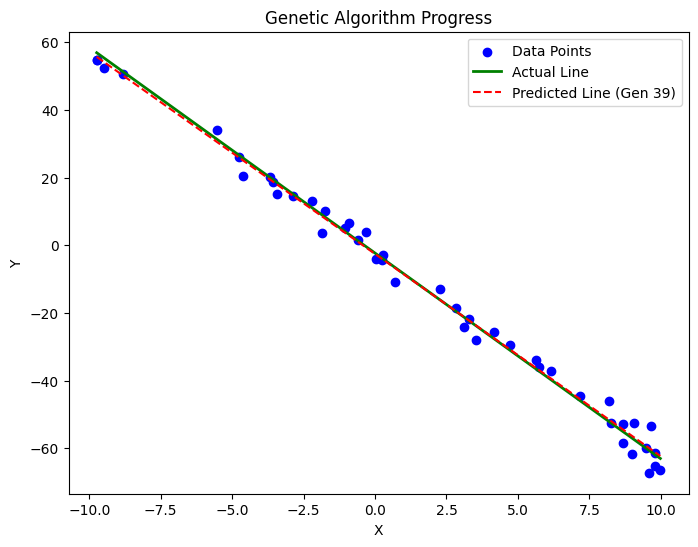

Generation 40, Best Error: 425.0875


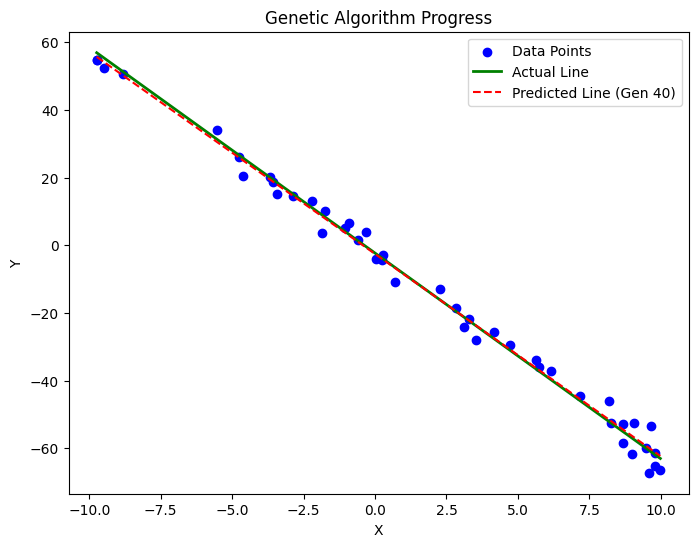

Generation 41, Best Error: 425.0875


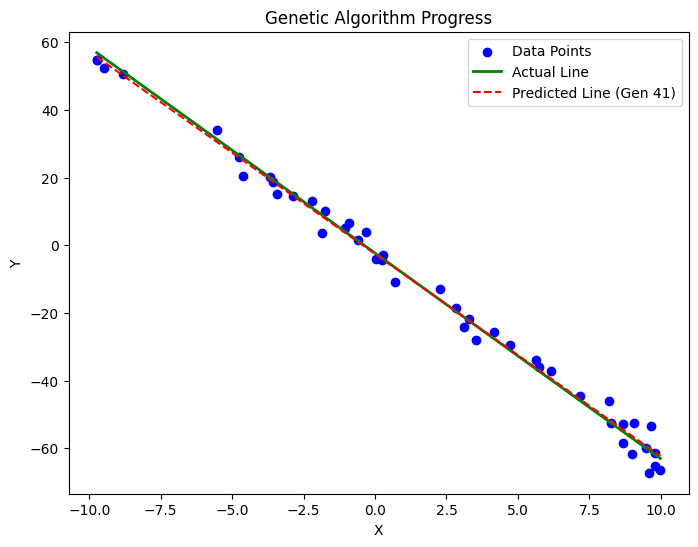

Generation 42, Best Error: 425.0875


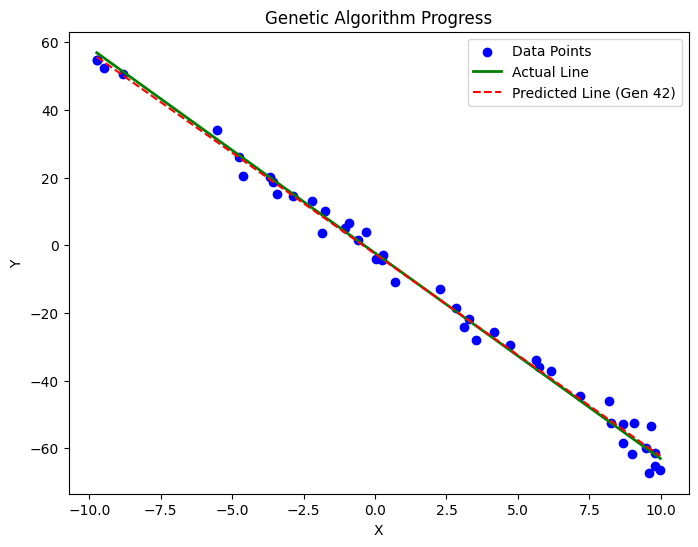

Generation 43, Best Error: 424.9557


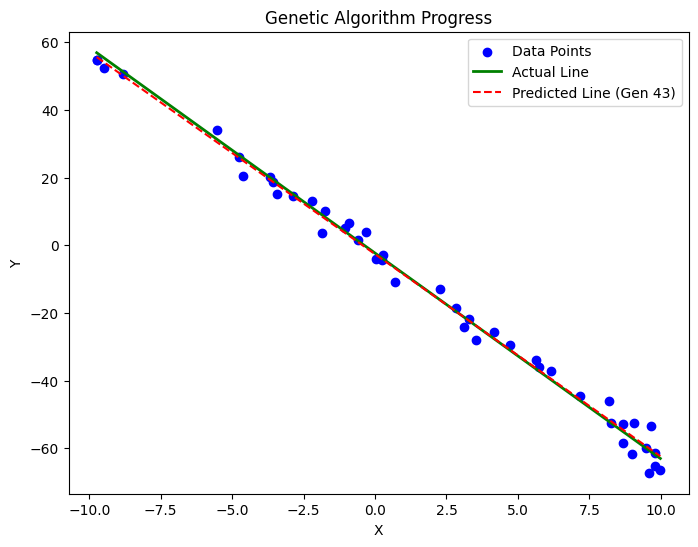

Generation 44, Best Error: 424.9557


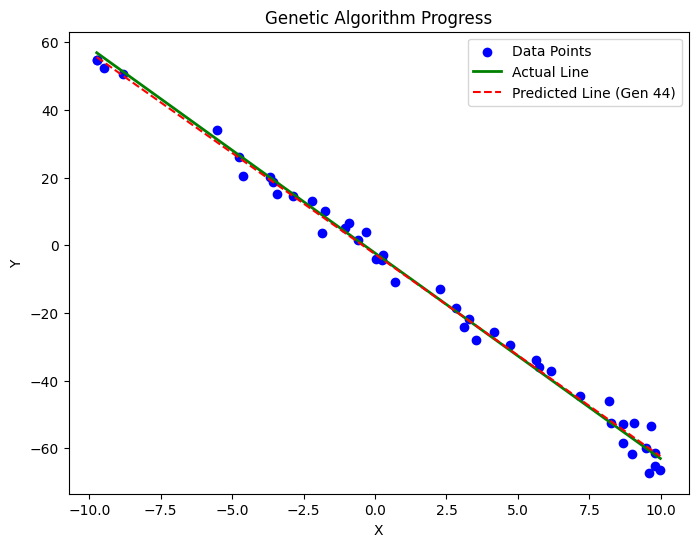

Generation 45, Best Error: 424.9557


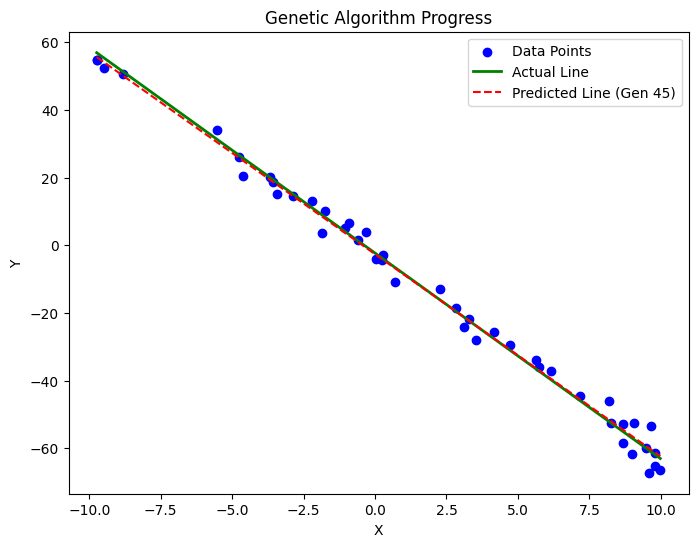

Generation 46, Best Error: 424.9557


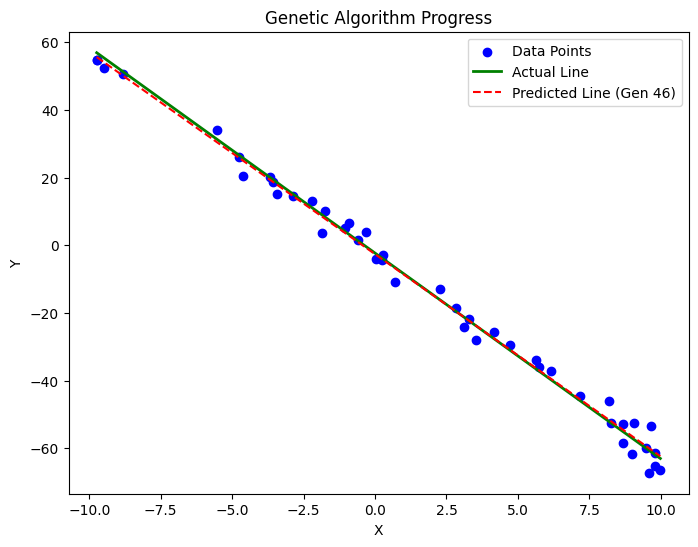

Generation 47, Best Error: 424.9499


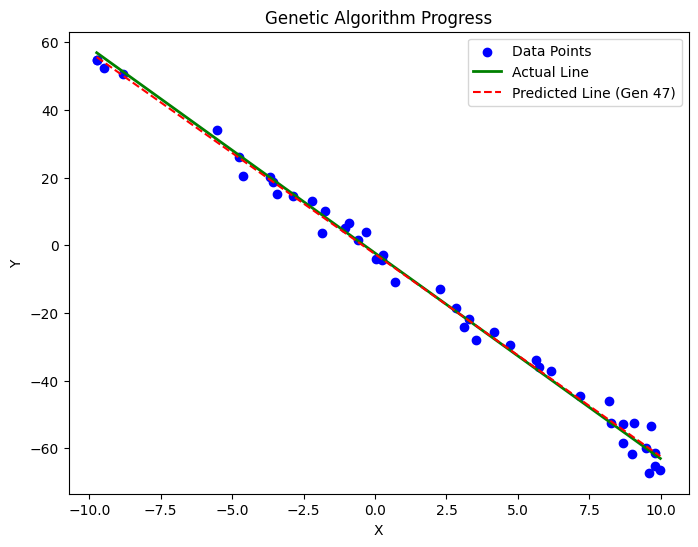

Generation 48, Best Error: 424.9499


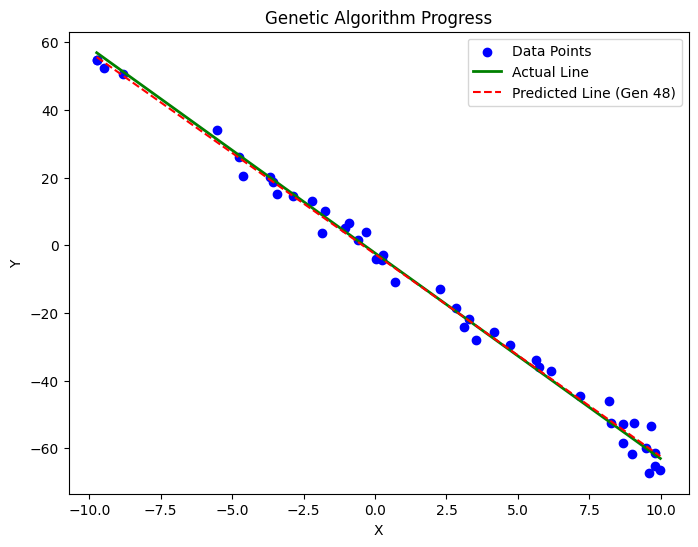

Generation 49, Best Error: 424.9499


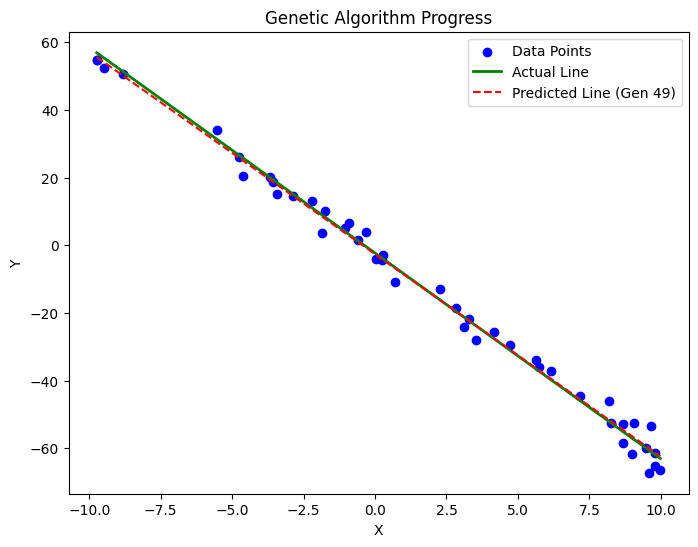

Generation 50, Best Error: 424.9499


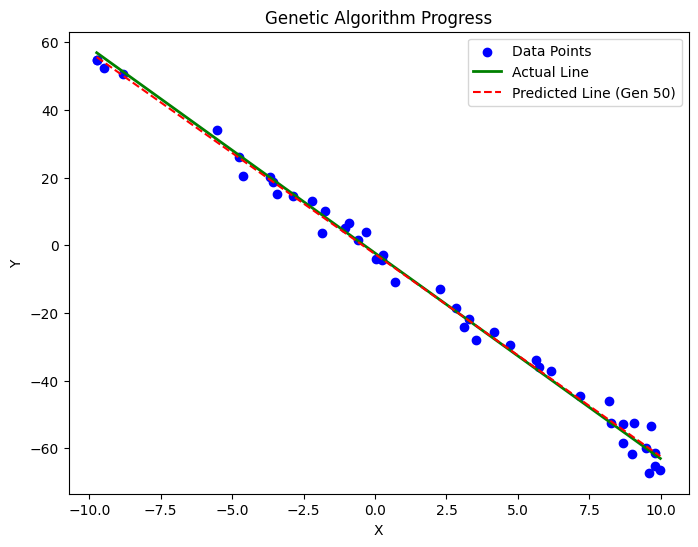

Generation 51, Best Error: 424.9499


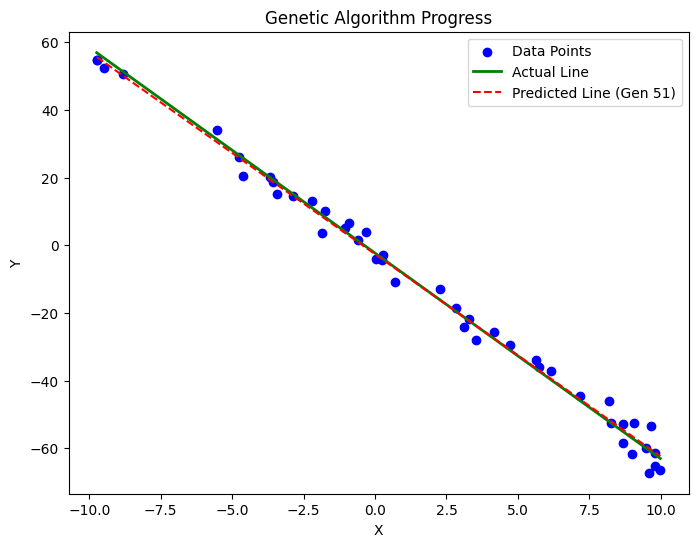

Generation 52, Best Error: 424.8953


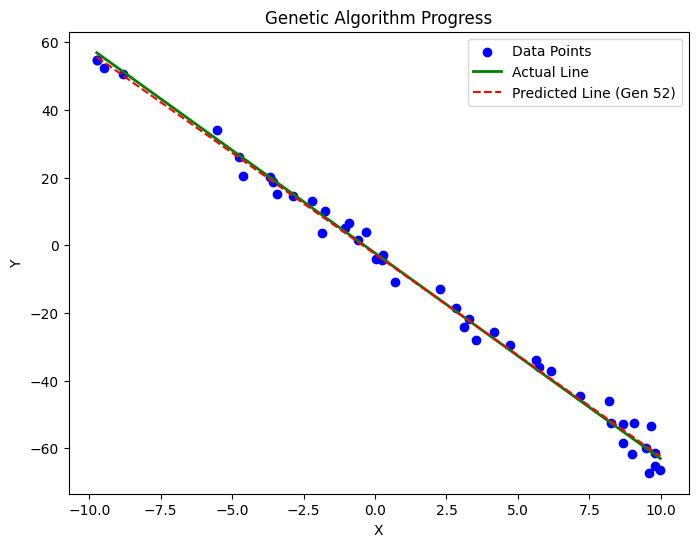

Generation 53, Best Error: 424.8953


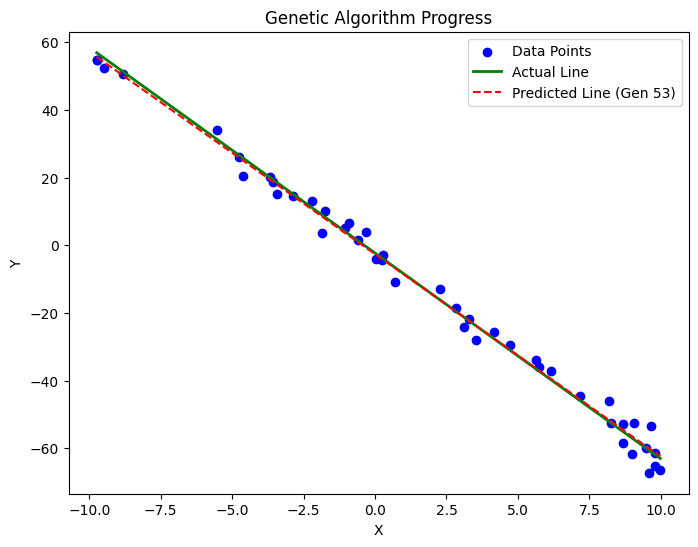

Generation 54, Best Error: 424.8953


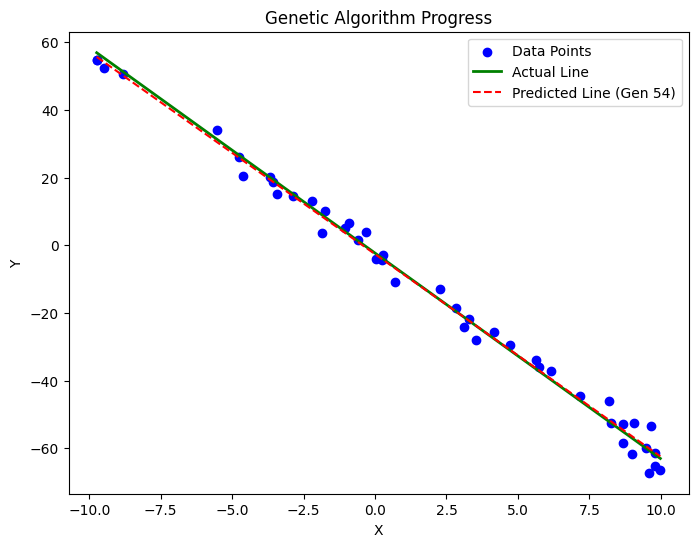

Generation 55, Best Error: 424.8953


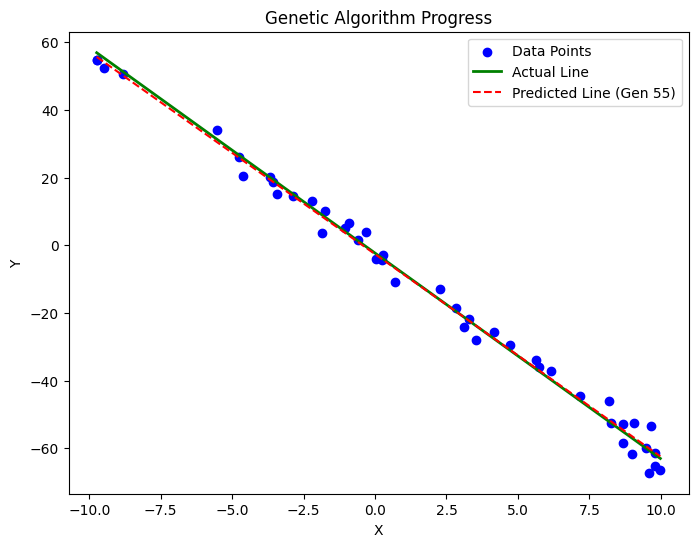

Generation 56, Best Error: 424.8953


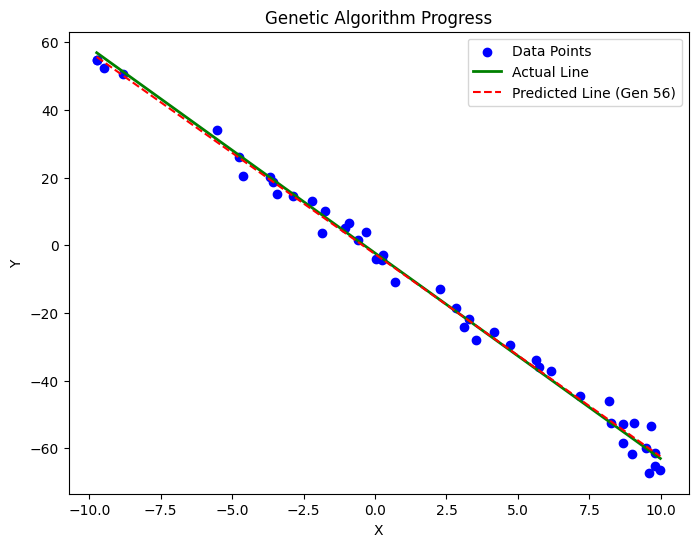

Generation 57, Best Error: 424.8953


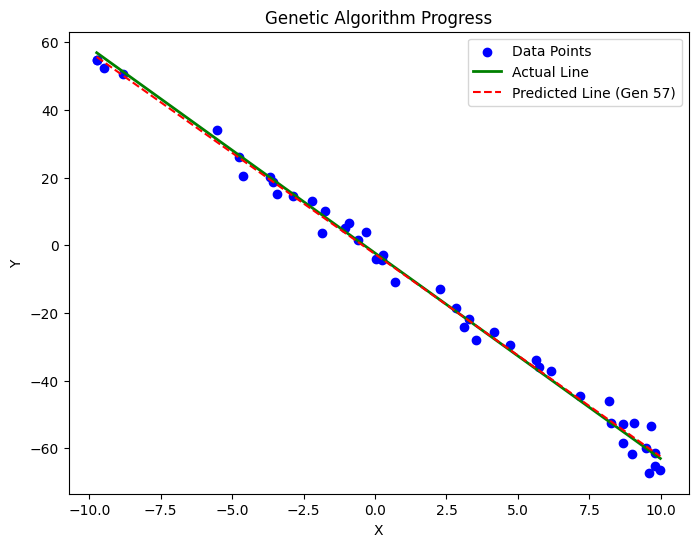

Generation 58, Best Error: 424.8953


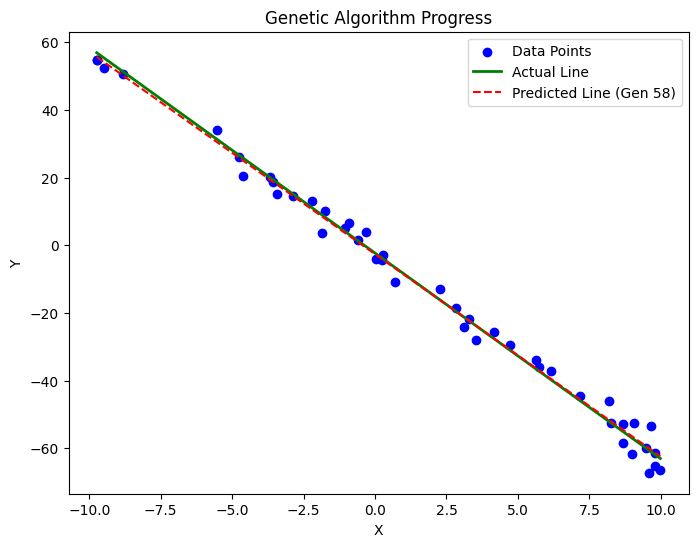

Generation 59, Best Error: 424.8953


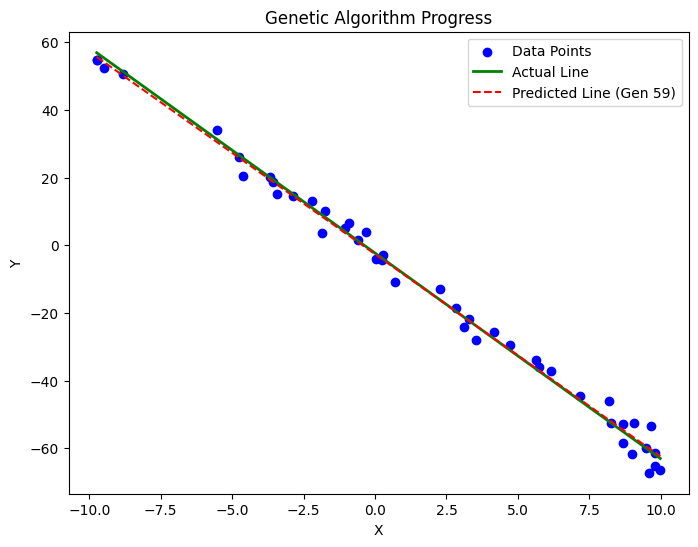

Generation 60, Best Error: 424.8867


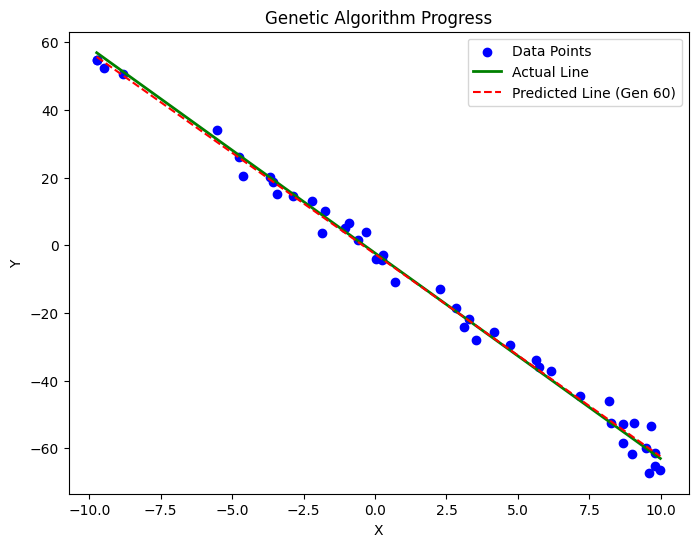

Generation 61, Best Error: 424.8867


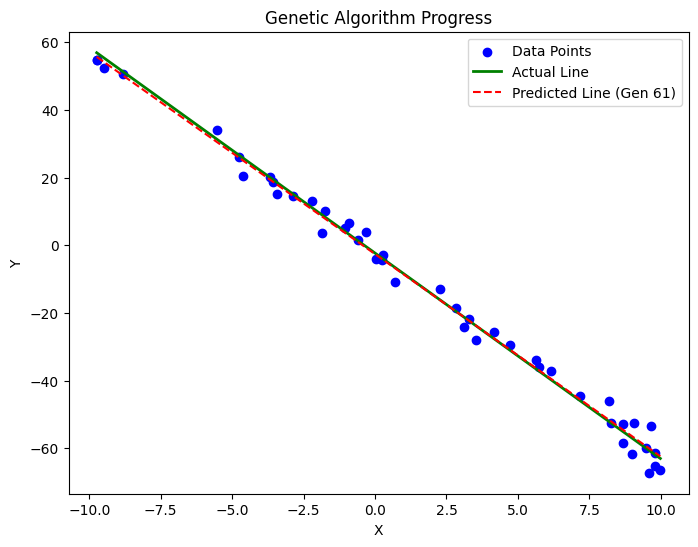

Generation 62, Best Error: 424.8867


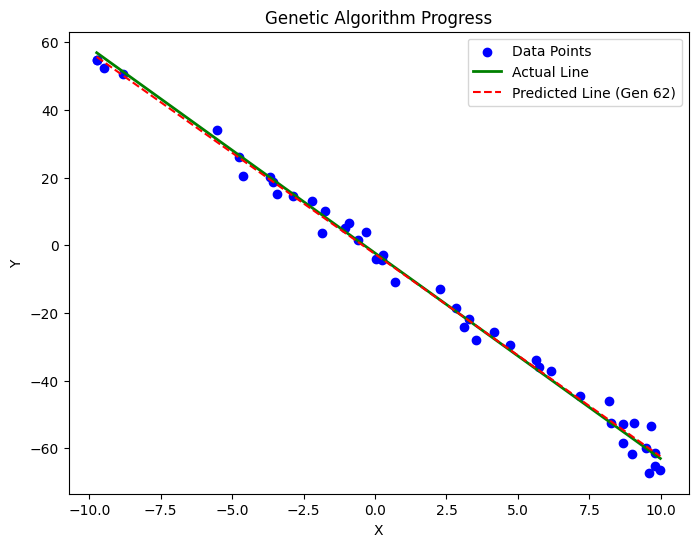

Generation 63, Best Error: 424.8867


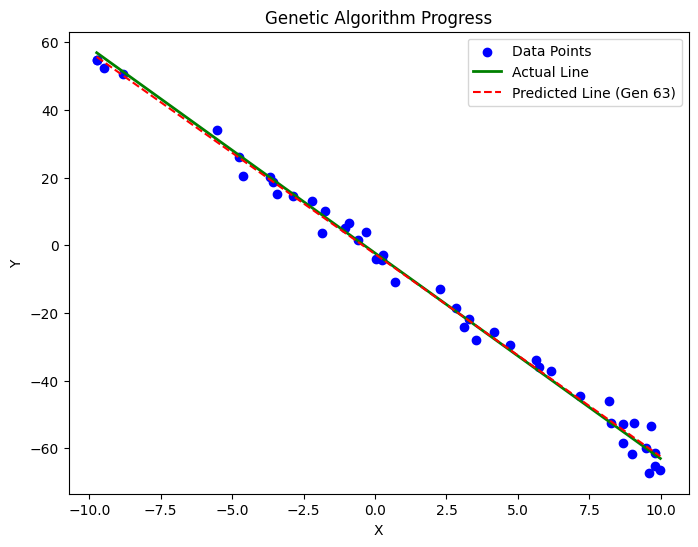

Generation 64, Best Error: 424.8867


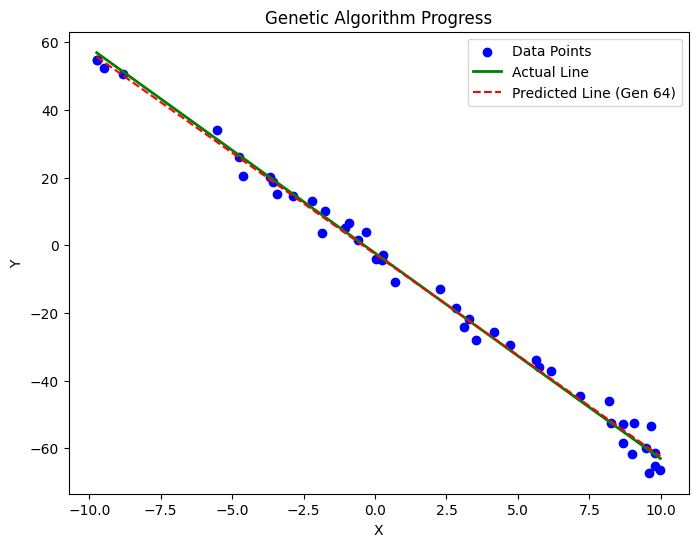

Generation 65, Best Error: 424.8867


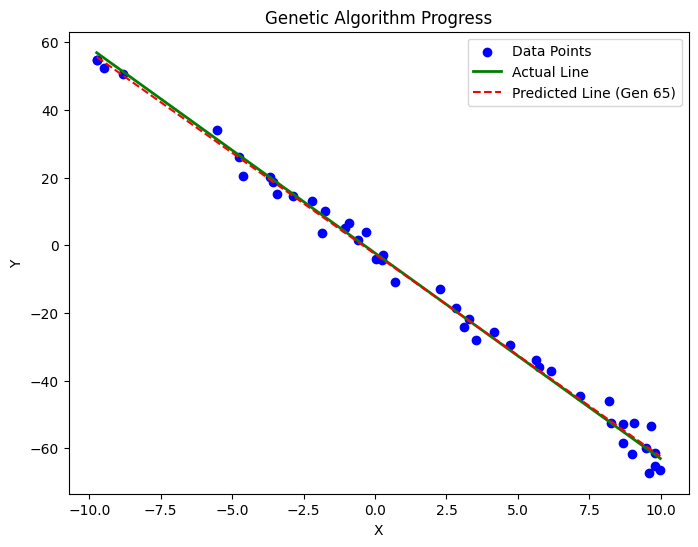

Generation 66, Best Error: 424.8867


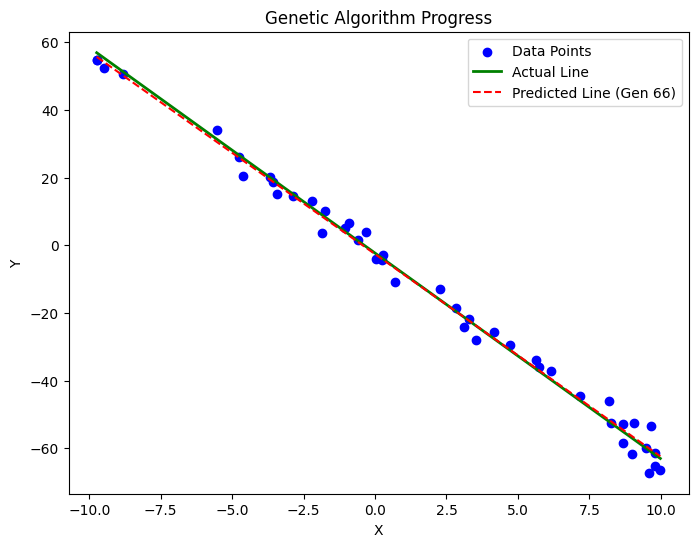

Generation 67, Best Error: 424.8867


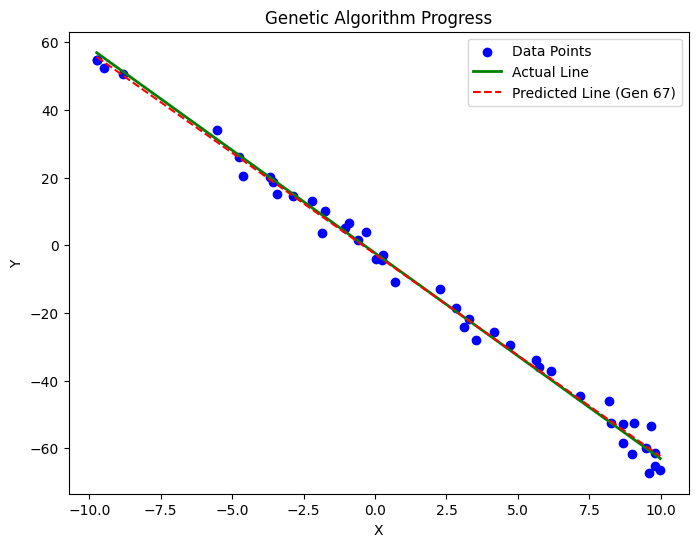

Generation 68, Best Error: 424.8867


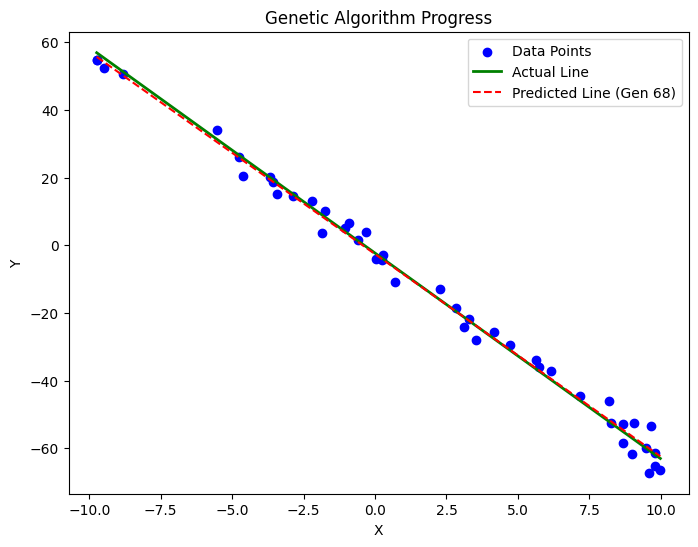

Generation 69, Best Error: 424.8867


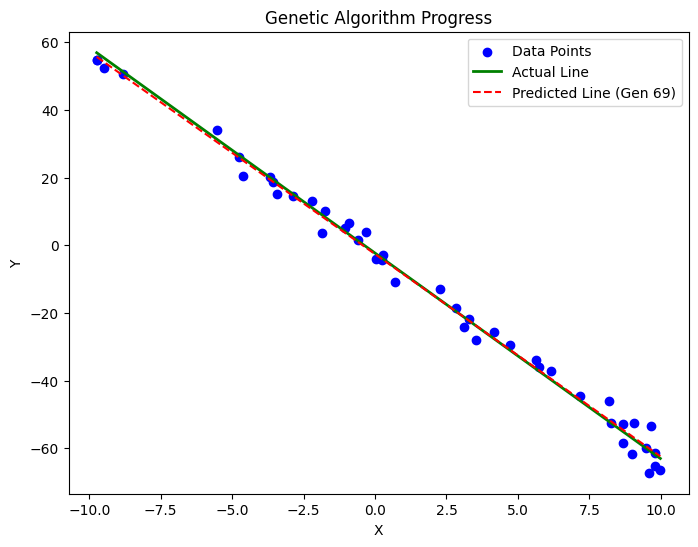

Generation 70, Best Error: 424.8867


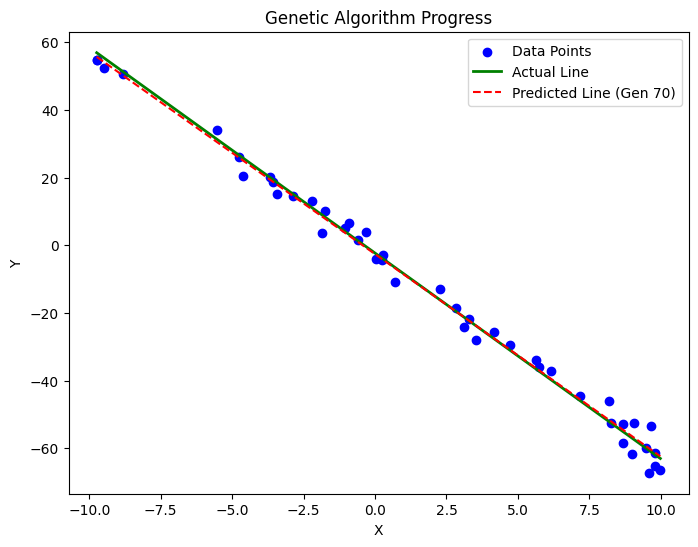

Generation 71, Best Error: 424.8867


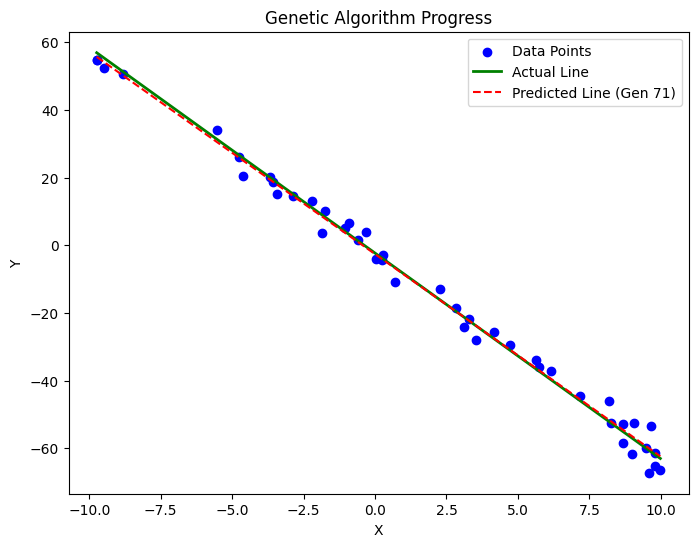

Generation 72, Best Error: 424.8867


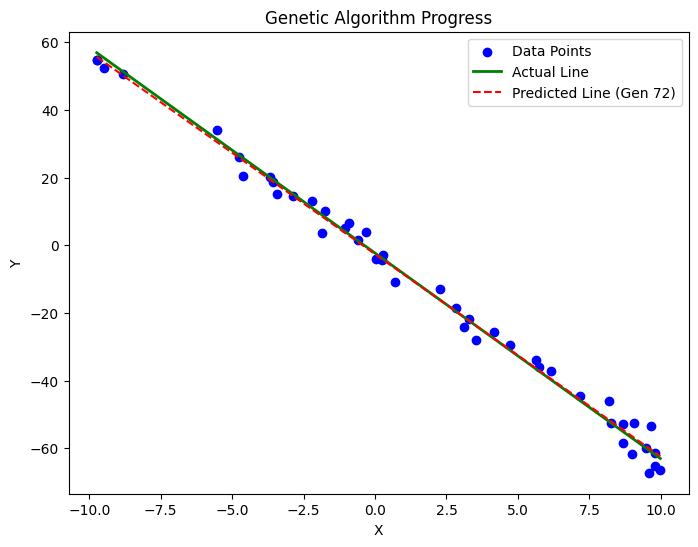

Generation 73, Best Error: 424.8867


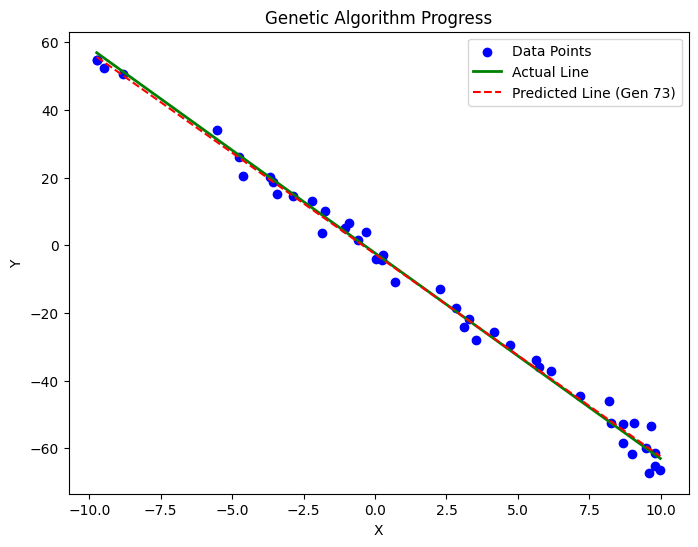

Generation 74, Best Error: 424.8867


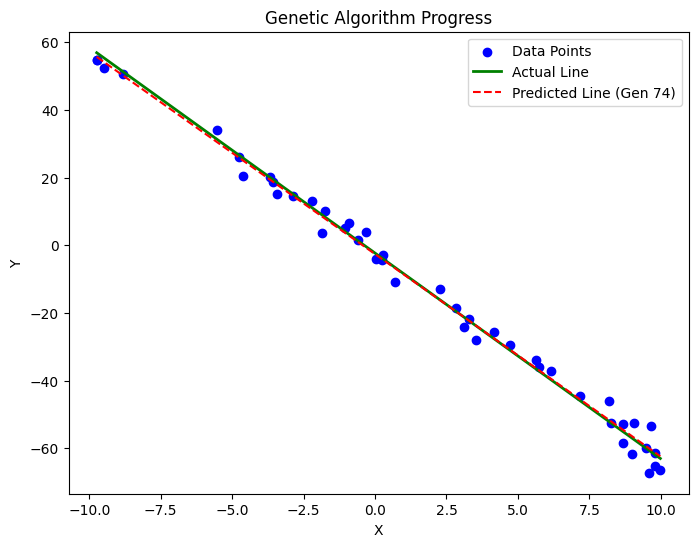

Generation 75, Best Error: 424.8867


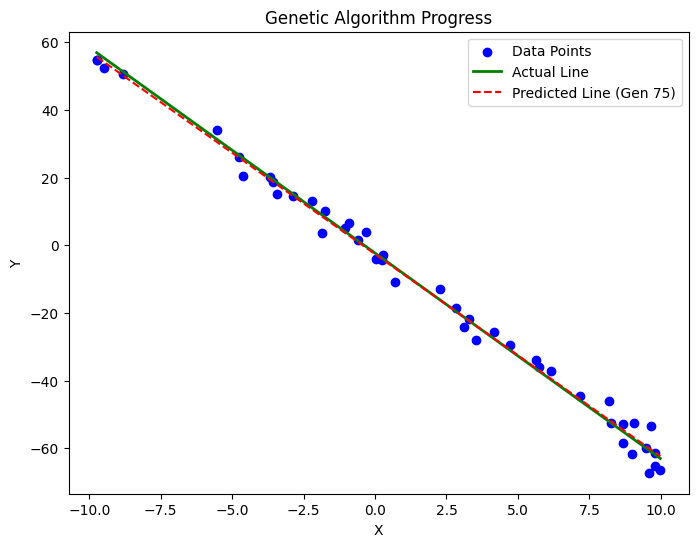

Generation 76, Best Error: 424.8867


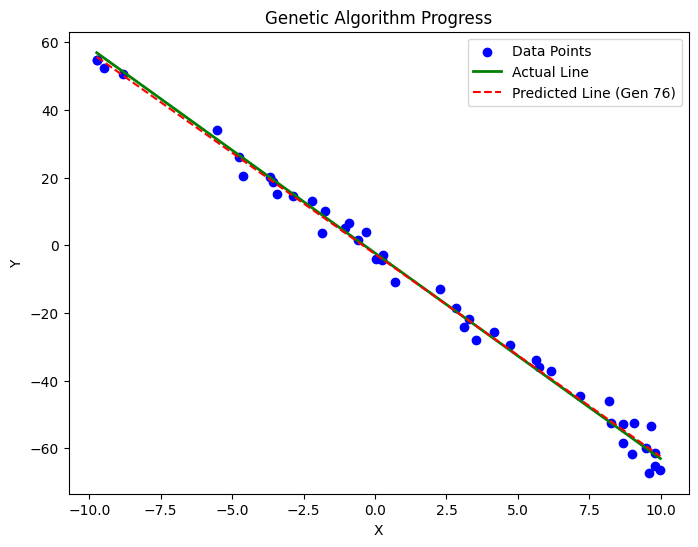

Generation 77, Best Error: 424.8867


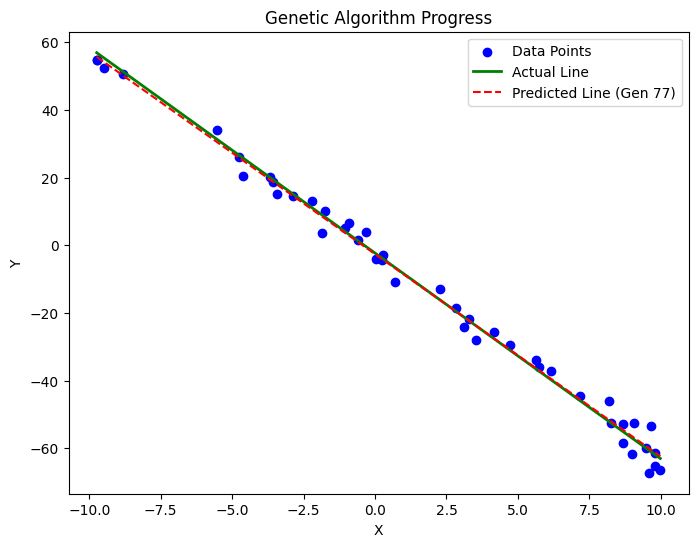

Generation 78, Best Error: 424.8867


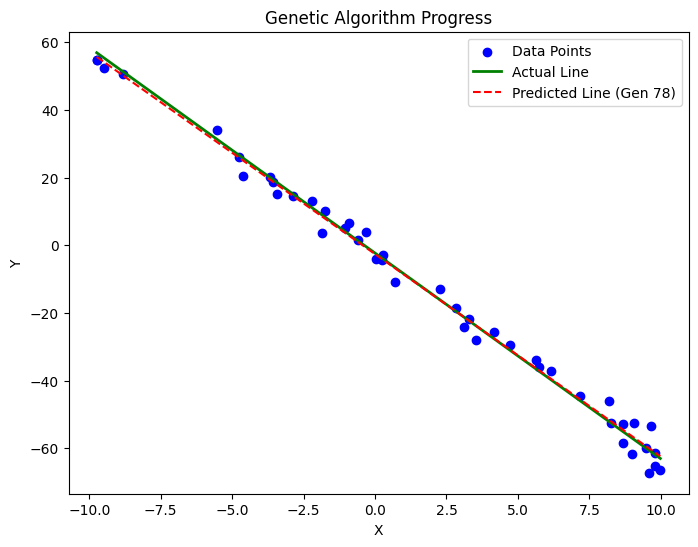

Generation 79, Best Error: 424.8867


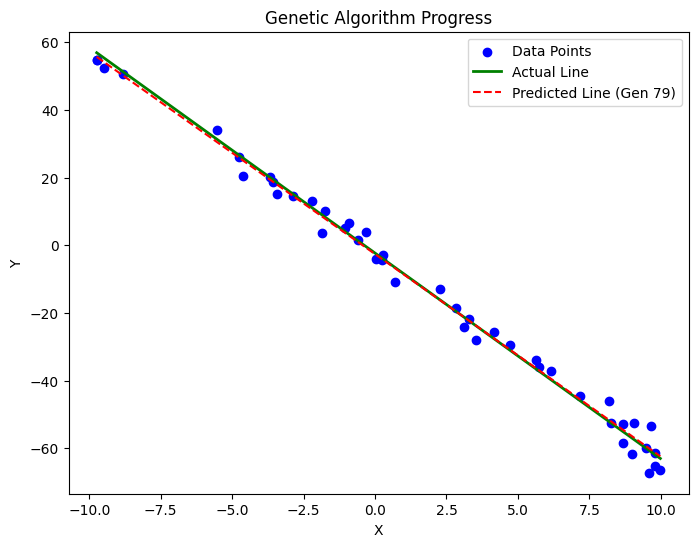

Generation 80, Best Error: 424.8867


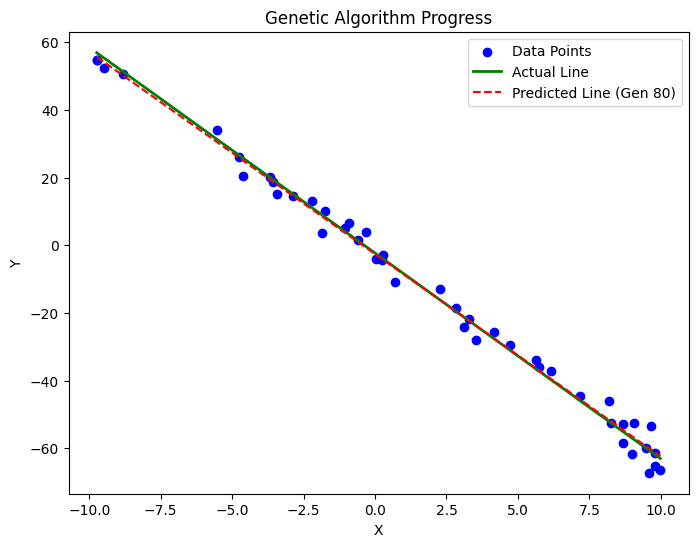

Generation 81, Best Error: 424.8867


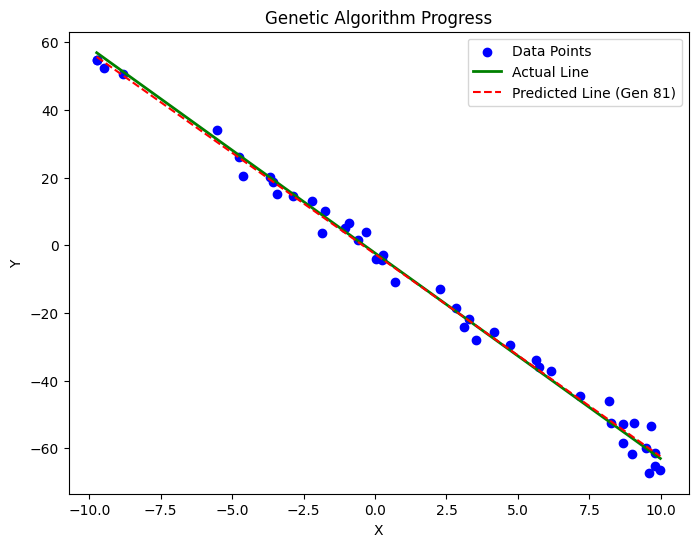

Generation 82, Best Error: 424.8867


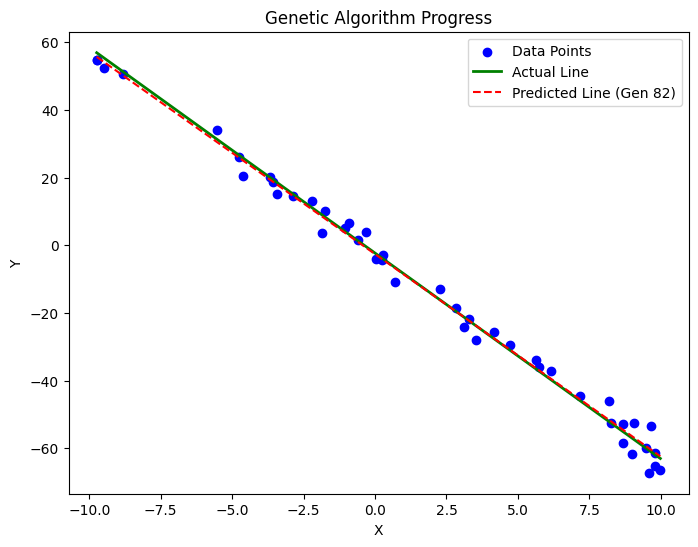

Generation 83, Best Error: 424.8867


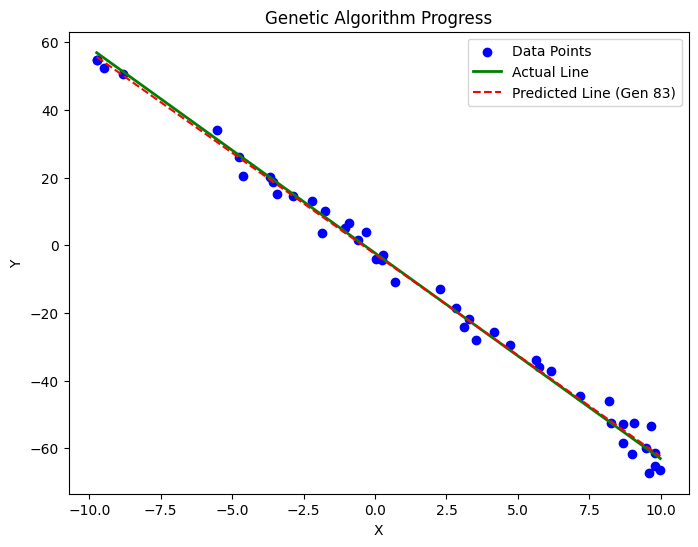

Generation 84, Best Error: 424.8867


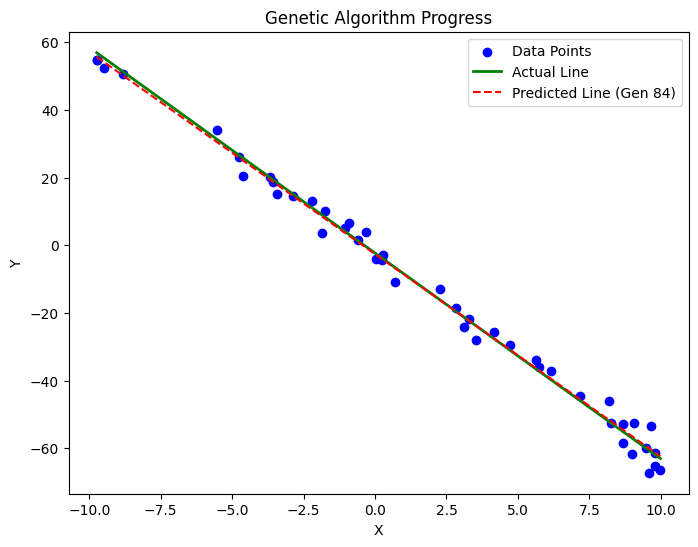

Generation 85, Best Error: 424.8867


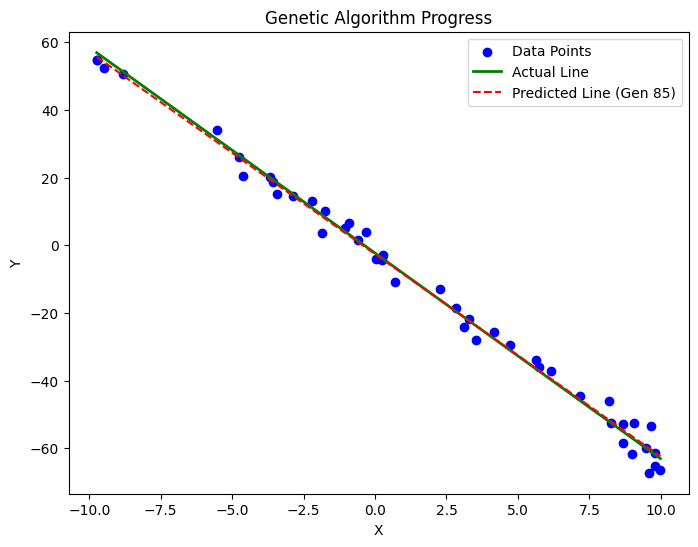

Generation 86, Best Error: 424.8867


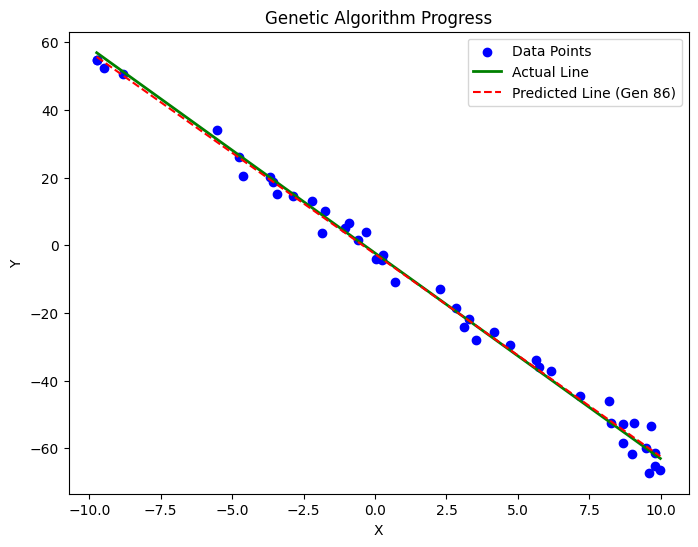

Generation 87, Best Error: 424.8867


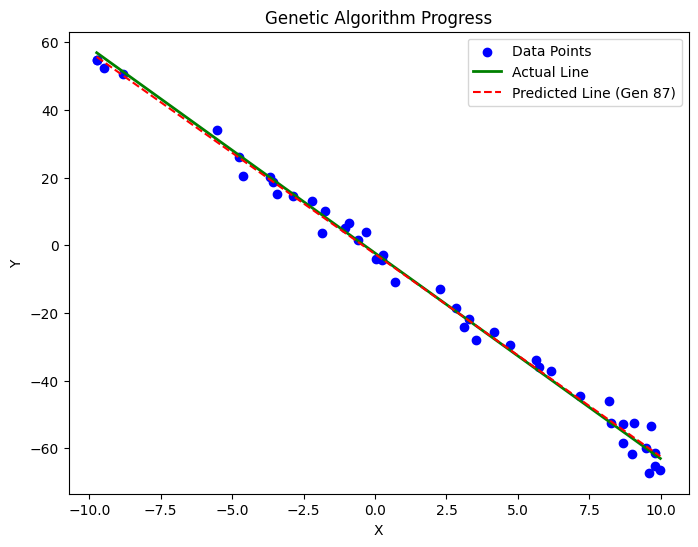

Generation 88, Best Error: 424.8867


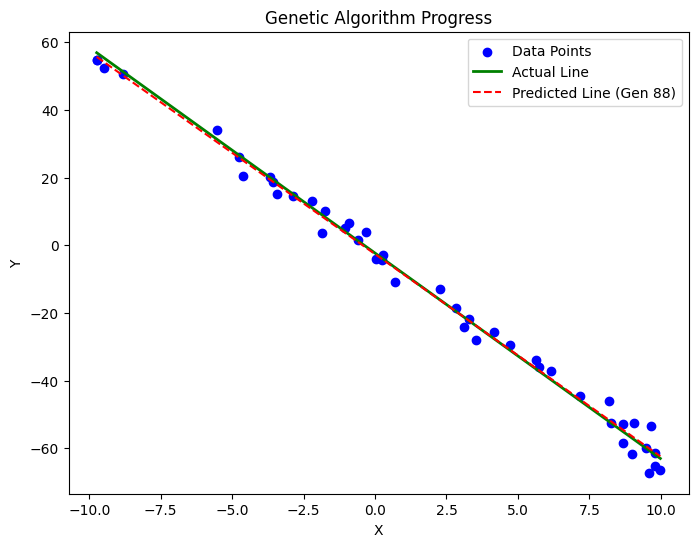

Generation 89, Best Error: 424.8867


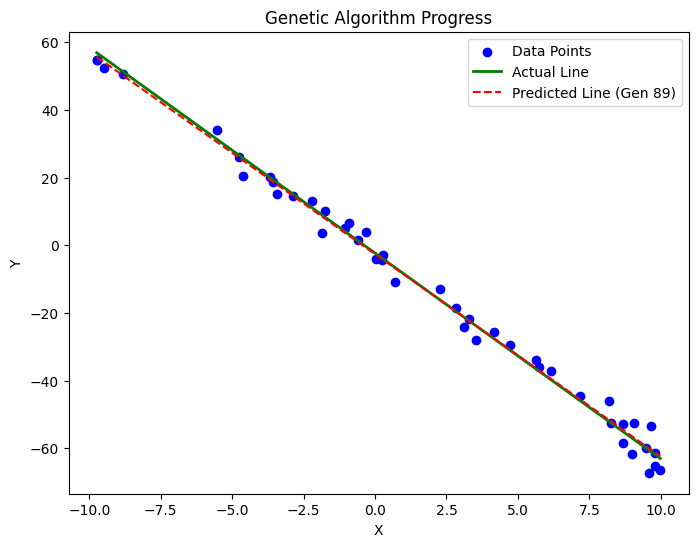

Generation 90, Best Error: 424.8867


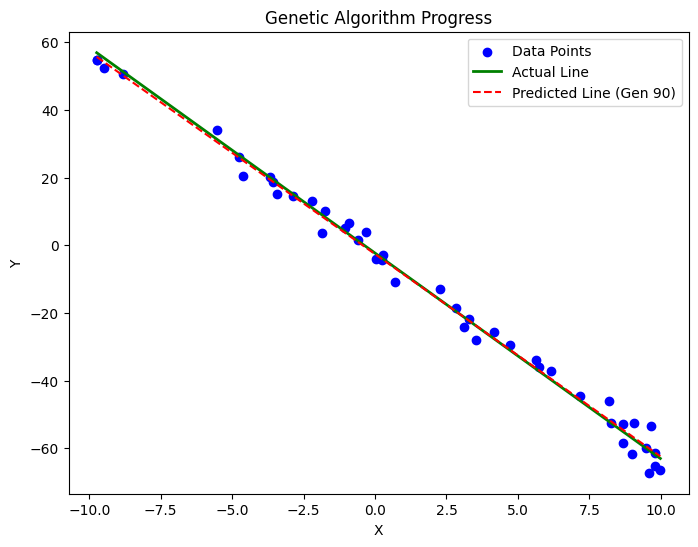

Generation 91, Best Error: 424.8867


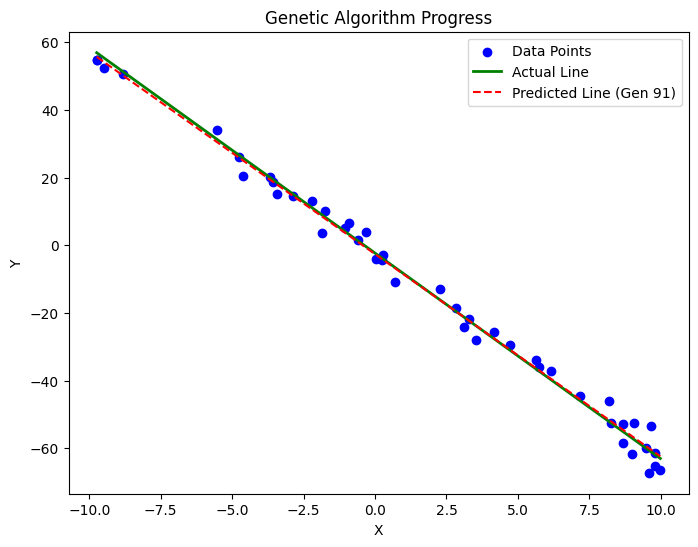

Generation 92, Best Error: 424.8867


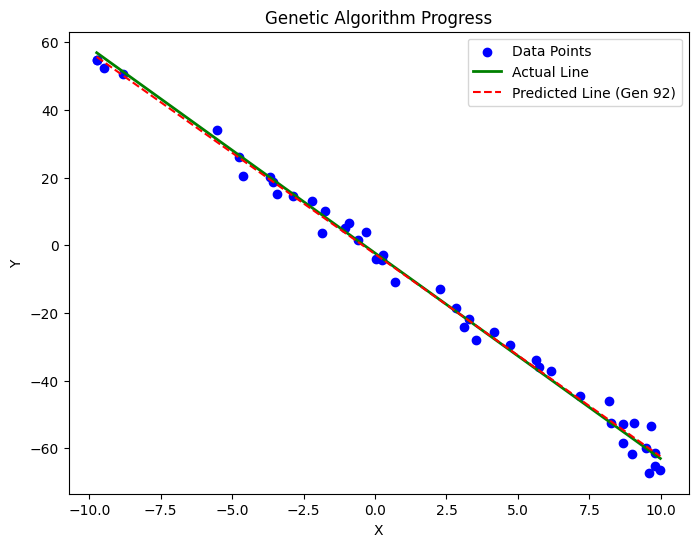

Generation 93, Best Error: 424.8867


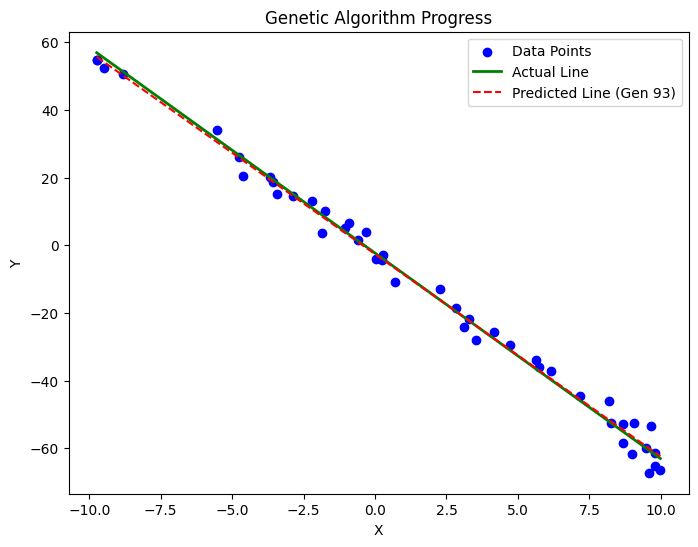

Generation 94, Best Error: 424.8867


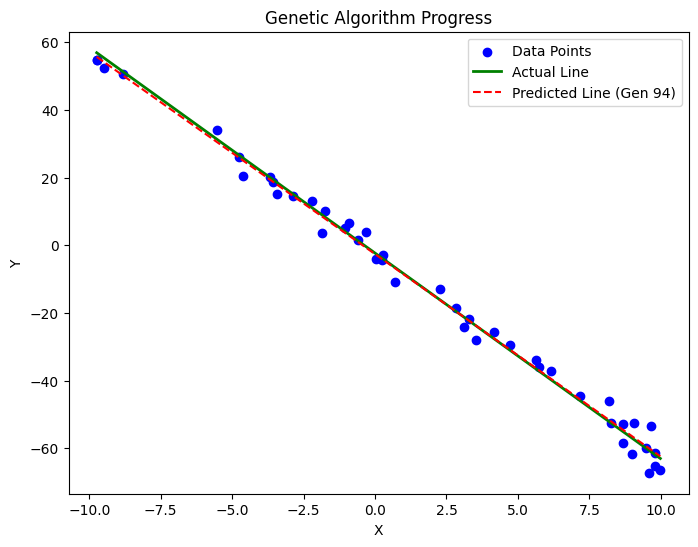

Generation 95, Best Error: 424.8867


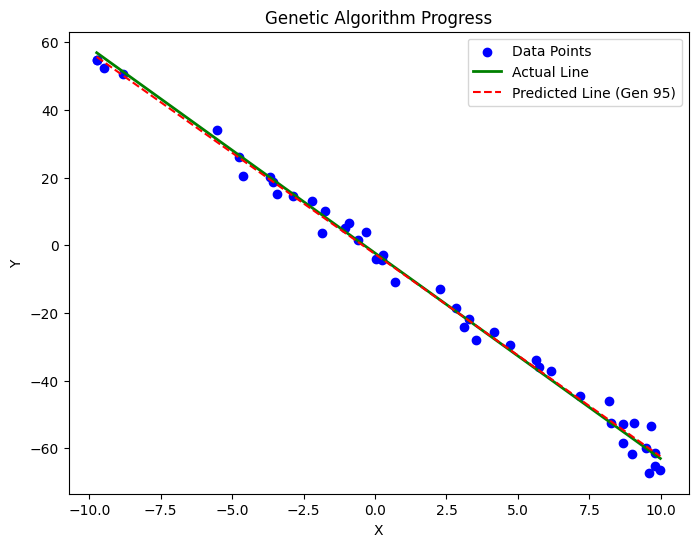

Generation 96, Best Error: 424.8867


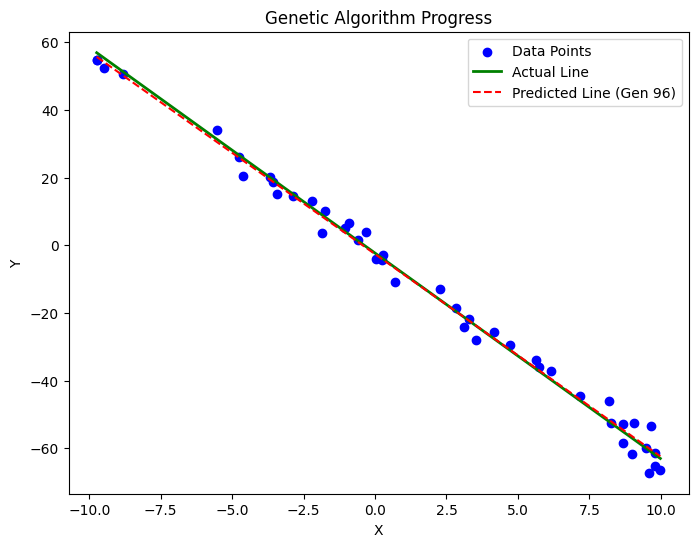

Generation 97, Best Error: 424.8866


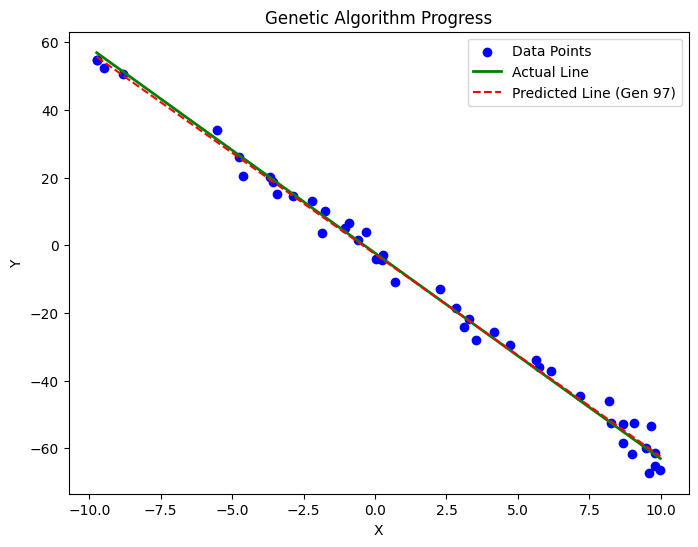

Generation 98, Best Error: 424.8866


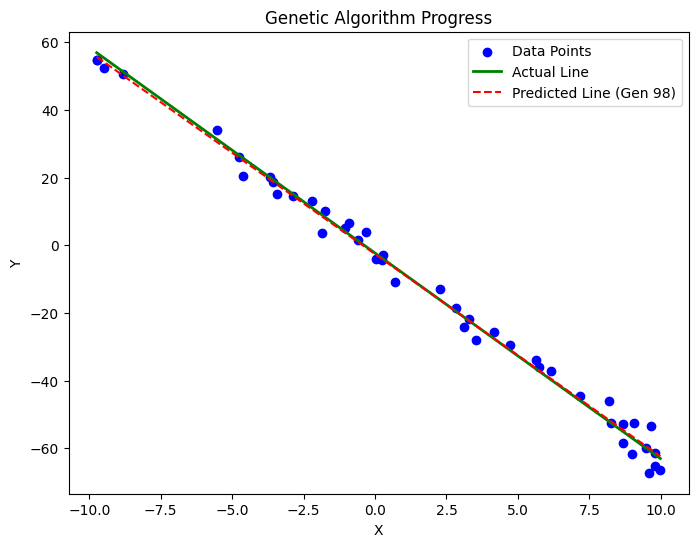

Generation 99, Best Error: 424.8866


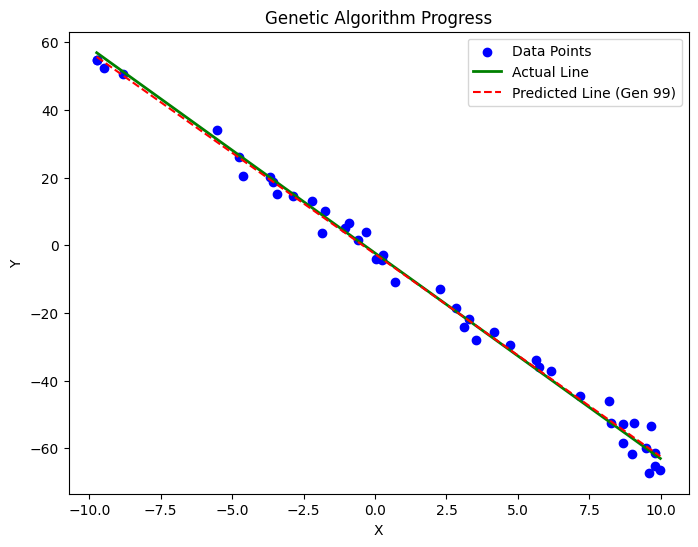

In [ ]:
# Run the algorithm
genetic_algorithm()